In [4]:
import pandas as pd

# Load the CSV files into pandas DataFrames
player_games_df = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv')
playerank_df = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/playerank.csv')

# Get column names of both DataFrames
player_games_columns = player_games_df.columns.tolist()
playerank_columns = playerank_df.columns.tolist()

# Print column names
print("Column names of player_games_df:", player_games_columns)
print("Column names of playerank_df:", playerank_columns)


Column names of player_games_df: ['Unnamed: 0', 'player_id', 'nickname', 'firstname', 'lastname', 'birth_date', 'player_name', 'team_id', 'jersey_number', 'minutes_played', 'is_starter', 'game_id']
Column names of playerank_df: ['goalScored', 'playerankScore', 'matchId', 'playerId', 'roleCluster', 'minutesPlayed']


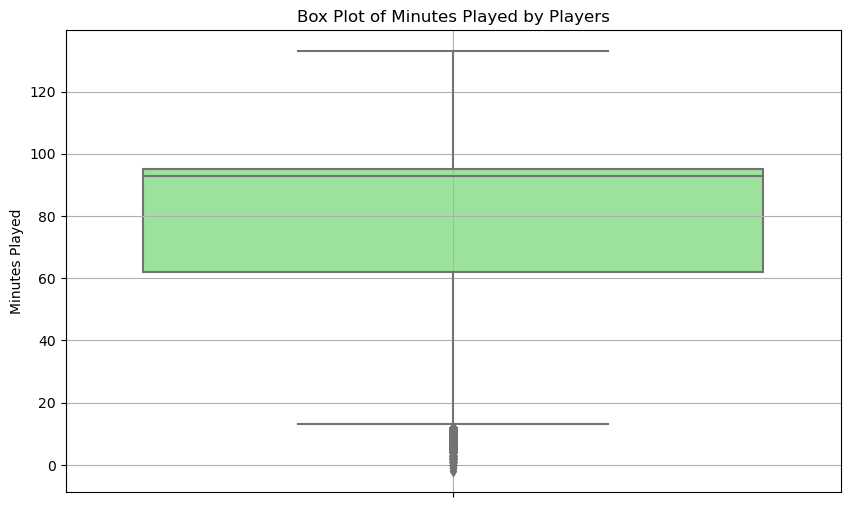

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a box plot to visualize the distribution of minutes played
plt.figure(figsize=(10, 6))
sns.boxplot(y=player_games_df['minutes_played'], color='lightgreen')
plt.title('Box Plot of Minutes Played by Players')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()


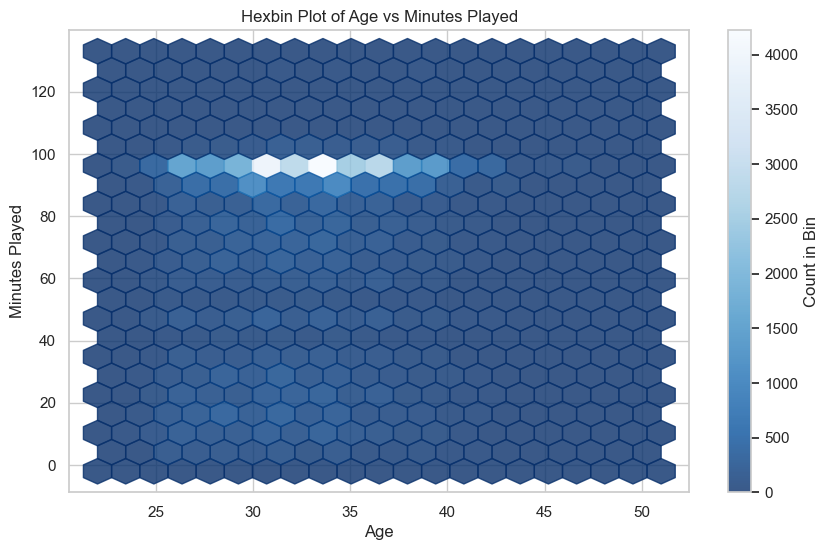

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
player_games_df = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv')

# Assuming 'birth_date' is in the format YYYY-MM-DD, we can calculate age
player_games_df['birth_date'] = pd.to_datetime(player_games_df['birth_date'])
player_games_df['age'] = (pd.Timestamp.now() - player_games_df['birth_date']) // pd.Timedelta(days=365.2425)

# Create a hexbin plot with a custom colormap (darker shades)
plt.figure(figsize=(10, 6))
plt.hexbin(x=player_games_df['age'], y=player_games_df['minutes_played'], gridsize=20, cmap='Blues_r', alpha=0.8)
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Age vs Minutes Played')
plt.xlabel('Age')
plt.ylabel('Minutes Played')
plt.grid(True)
plt.show()


In [18]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
player_games_df = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv')

# Group the data by 'is_starter' and calculate summary statisti`cs for minutes played
summary_stats_by_starter = player_games_df.groupby('is_starter')['minutes_played'].describe()

# Print the summary statistics
print("Summary Statistics for Minutes Played by Starter Status:")
print(summary_stats_by_starter)

# Additional performance metrics can be analyzed similarly, e.g., mean, median, etc.


Summary Statistics for Minutes Played by Starter Status:
              count       mean        std  min   25%   50%   75%    max
is_starter                                                             
False       11079.0  24.252369  15.187070 -2.0  13.0  22.0  32.0  109.0
True        42636.0  88.634253  13.696364  3.0  89.0  94.0  96.0  133.0


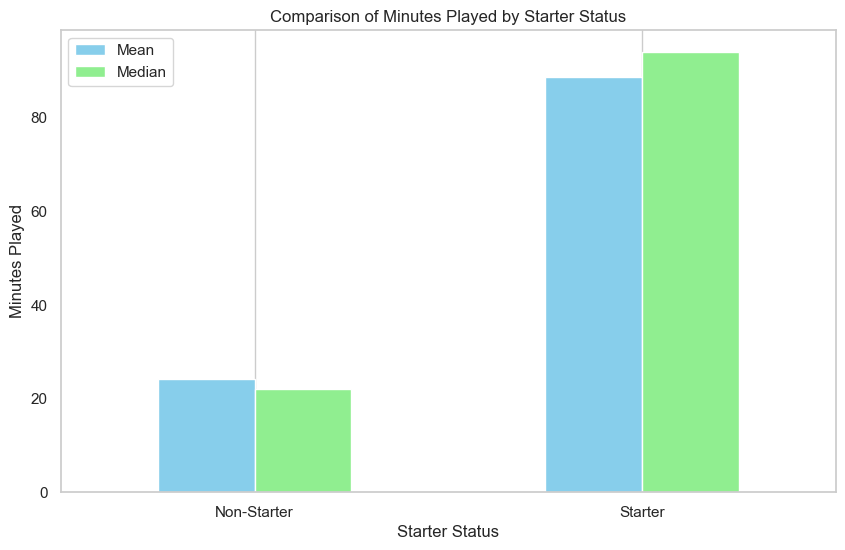

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
player_games_df = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv')

# Group the data by 'is_starter' and calculate summary statistics for minutes played
summary_stats_by_starter = player_games_df.groupby('is_starter')['minutes_played'].describe()

# Plot the comparison between starters and non-starters in terms of minutes played
summary_stats_by_starter[['mean', '50%']].plot(kind='bar', figsize=(10, 6), color=['skyblue', 'lightgreen'])
plt.title('Comparison of Minutes Played by Starter Status')
plt.xlabel('Starter Status')
plt.ylabel('Minutes Played')
plt.xticks([0, 1], ['Non-Starter', 'Starter'], rotation=0)
plt.legend(['Mean', 'Median'])
plt.grid(axis='y')
plt.show()


In [1]:
!pip install mplsoccer

  Obtaining dependency information for mplsoccer from https://files.pythonhosted.org/packages/2e/64/2f7ca21b33d0bf9fe48a65103782e7b14b412efb7e8bac5ecccf063d0dd4/mplsoccer-1.2.4-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.4/79.4 kB 1.8 MB/s eta 0:00:00eta 0:00:01


In [3]:
import pandas as pd
import numpy as np
import json
from ast import literal_eval

#Plotting
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch, VerticalPitch

#Statistical fitting of models
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
train = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/events_England.csv')
train.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85.0,177959171,[1801],49,49,78,31
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83.0,177959172,[1801],78,31,75,51
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82.0,177959173,[1801],75,51,71,35
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82.0,177959174,[1801],71,35,95,41
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85.0,177959175,[1801],95,41,88,72


In [5]:
pd.unique(train['subEventName'])

array(['Simple pass', 'High pass', 'Head pass', 'Air duel',
       'Ground loose ball duel', 'Smart pass', 'Launch',
       'Ground defending duel', 'Ground attacking duel', 'Foul',
       'Free Kick', 'Cross', 'Shot', 'Reflexes', 'Touch', 'Clearance',
       'Ball out of the field', 'Throw in', 'Goal kick', 'Corner',
       'Goalkeeper leaving line', 'Hand pass', 'Acceleration',
       'Save attempt', nan, 'Free kick cross', 'Free kick shot',
       'Hand foul', 'Violent Foul', 'Protest', 'Whistle',
       'Late card foul', 'Out of game foul', 'Penalty', 'Time lost foul',
       'Simulation'], dtype=object)

In [6]:
shots=train[train['subEventName']=='Shot']
shots_model=pd.DataFrame(columns=['Goal','X','Y'])
shots.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
46,10,Shot,"[{'id': 101}, {'id': 402}, {'id': 201}, {'id':...",25413,"[{'y': 41, 'x': 88}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,94.595788,100.0,177959212,"[101, 402, 201, 1205, 1801]",41,88,0,0
62,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1211}, {'id'...",26150,"[{'y': 52, 'x': 85}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,179.854785,100.0,177959247,"[401, 201, 1211, 1802]",52,85,100,100
91,10,Shot,"[{'id': 101}, {'id': 403}, {'id': 201}, {'id':...",14763,"[{'y': 52, 'x': 96}, {'y': 100, 'x': 100}]",2499719,Shot,1631,1H,254.745027,100.0,177959280,"[101, 403, 201, 1207, 1801]",52,96,100,100
128,10,Shot,"[{'id': 401}, {'id': 201}, {'id': 1215}, {'id'...",7868,"[{'y': 33, 'x': 81}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,425.824035,100.0,177959289,"[401, 201, 1215, 1802]",33,81,0,0
249,10,Shot,"[{'id': 402}, {'id': 201}, {'id': 1205}, {'id'...",7868,"[{'y': 30, 'x': 75}, {'y': 0, 'x': 0}]",2499719,Shot,1609,1H,815.462015,100.0,177959429,"[402, 201, 1205, 1801]",30,75,0,0


In [7]:
## way of forcing pandas to define column of list as list, instead of string
shots['positions'] = shots['positions'].apply(literal_eval)
shots['tagsList'] = shots['tagsList'].apply(literal_eval)
shots = shots.explode('tagsList', ignore_index=True)

/var/folders/x9/66v30vmj1w7bc7k3zz3xtp5m0000gn/T/ipykernel_6848/217101978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['positions'] = shots['positions'].apply(literal_eval)
/var/folders/x9/66v30vmj1w7bc7k3zz3xtp5m0000gn/T/ipykernel_6848/217101978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['tagsList'] = shots['tagsList'].apply(literal_eval)


In [10]:
### selecting only shots and goals and dropping "shots" that are goals (duplicate information)
shotsGoals = shots[ (shots.tagsList!=403) | (shots.tagsList==101) ]
shotsGoals.head()
shotsGoals.drop_duplicates(subset='id', keep='first', inplace=True)

shots_model =pd.DataFrame()
shots_model['Goal'] = np.where( shotsGoals.tagsList==101, 1, 0 )
shots_model['X'] = shotsGoals['positions'].str[0].str['x']
shots_model['Y'] = shotsGoals['positions'].str[0].str['y']
x_in_m = shots_model['X']*105/100
y_in_m = abs(shots_model['Y']-50)*65/100
shots_model['Distance'] = np.sqrt( (x_in_m)**2 + (y_in_m)**2 )
shots_model['Angle'] = np.arctan(7.32 * x_in_m /(x_in_m**2 + y_in_m**2 - (7.32/2)**2))
shots_model['Angle'] = np.where( shots_model['Angle']<0, np.pi*shots_model['Angle'], shots_model['Angle'] )
shots_model.head()

/var/folders/x9/66v30vmj1w7bc7k3zz3xtp5m0000gn/T/ipykernel_6848/1529981058.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shotsGoals.drop_duplicates(subset='id', keep='first', inplace=True)


,Goal,X,Y,Distance,Angle
0,1,88.0,41.0,92.585001,0.078864
1,0,NaN,NaN,NaN,NaN
2,1,NaN,NaN,NaN,NaN
3,0,NaN,NaN,NaN,NaN
4,0,NaN,NaN,NaN,NaN


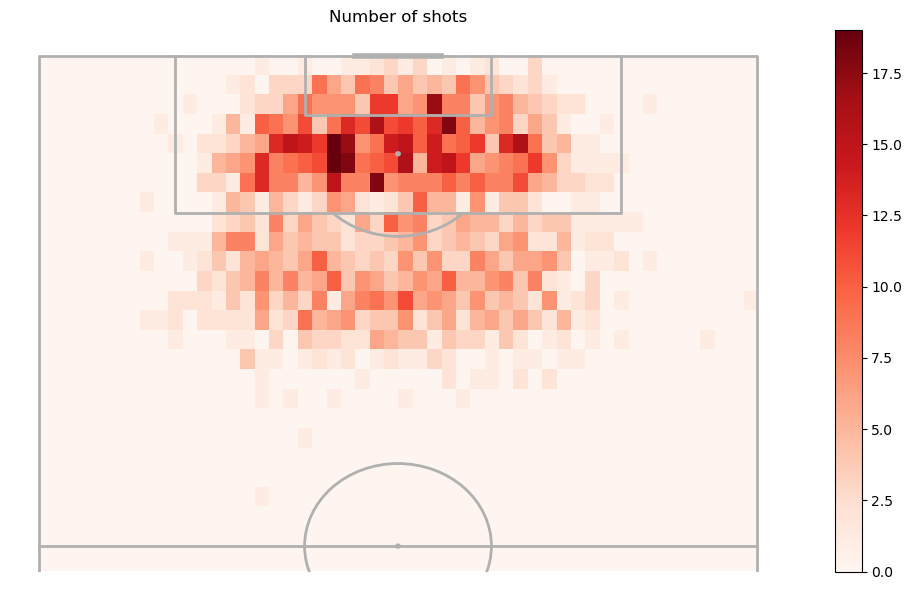

In [11]:
#PLOTTING NUMBER OF SHOTS FROM DIFFERENT POINTS
pitch = VerticalPitch(pitch_type='wyscout', half=True)
fig, ax = pitch.draw( figsize=(10,6) )
H_Shot=np.histogram2d(shots_model['X'], shots_model['Y'],bins=50,range=[[0, 100],[0, 100]])
pos=ax.imshow(H_Shot[0], extent=[0,100,100,0], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of shots')
plt.tight_layout()
plt.show()
# fig.savefig('Output/NumberOfShots.pdf', dpi=None, bbox_inches="tight") 

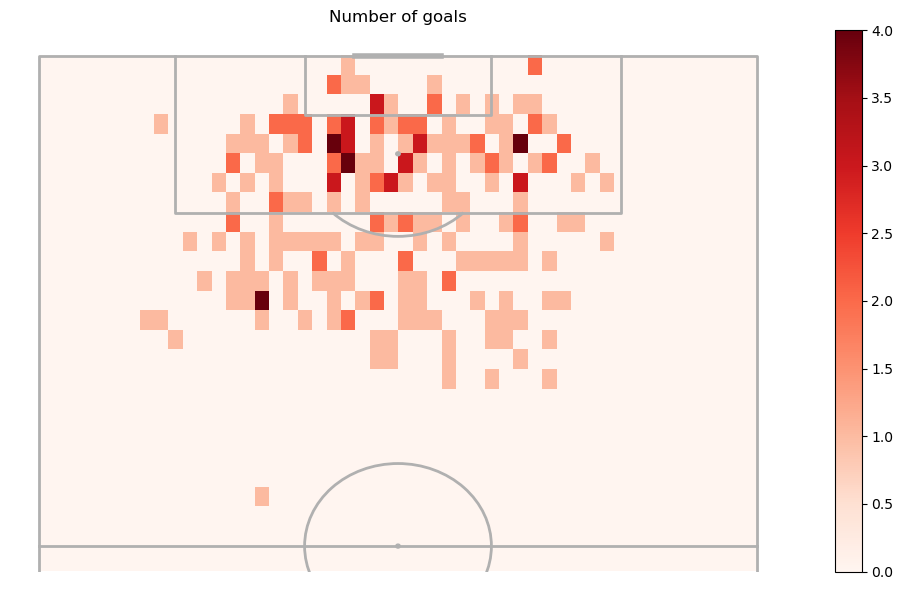

In [12]:
#PLOTTING NUMBER OF GOALS FROM DIFFERENT POINTS
goals_only=shots_model[shots_model['Goal']==1]
H_Goal=np.histogram2d(goals_only['X'], goals_only['Y'],bins=50,range=[[0, 100],[0, 100]])

pitch = VerticalPitch(pitch_type='wyscout', half=True)
fig, ax = pitch.draw( figsize=(10,6) )
pos=ax.imshow(H_Goal[0], extent=[0,100,100,0], aspect='auto',cmap=plt.cm.Reds)
fig.colorbar(pos, ax=ax)
ax.set_title('Number of goals')
plt.tight_layout()
plt.show()
# fig.savefig('Output/NumberOfGoals.pdf', dpi=None, bbox_inches="tight") 

/var/folders/x9/66v30vmj1w7bc7k3zz3xtp5m0000gn/T/ipykernel_6848/4230295851.py:4: RuntimeWarning: invalid value encountered in divide
  pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[0,100,100,0], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)


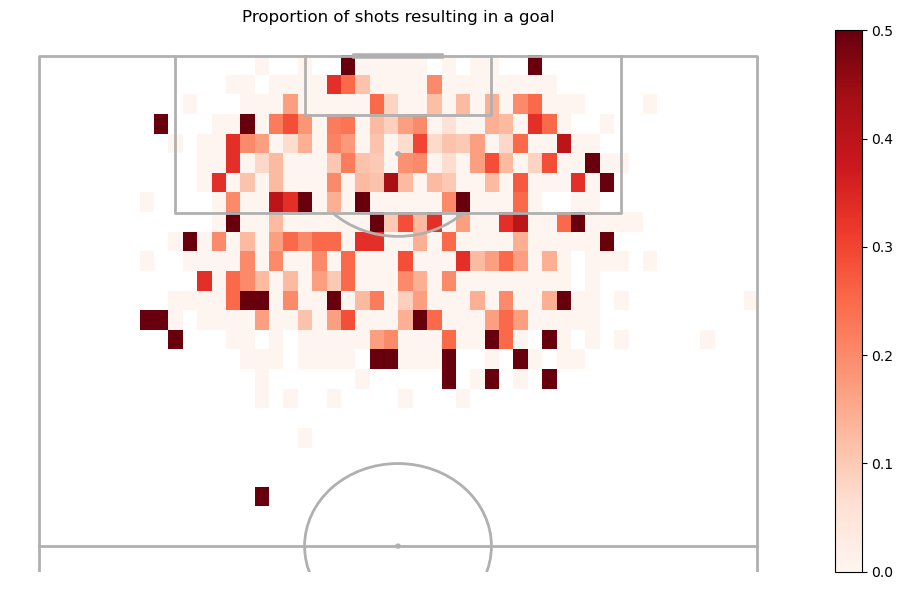

In [13]:
#PROBABILITY OF SCORING FROM DIFFERENT POINTS
pitch = VerticalPitch(pitch_type='wyscout', half=True)
fig, ax = pitch.draw( figsize=(10,6) )
pos=ax.imshow(H_Goal[0]/H_Shot[0], extent=[0,100,100,0], aspect='auto',cmap=plt.cm.Reds,vmin=0, vmax=0.5)
fig.colorbar(pos, ax=ax)
ax.set_title('Proportion of shots resulting in a goal')
plt.tight_layout()
plt.show()
# fig.savefig('Output/ProbabilityOfScoring.pdf', dpi=None, bbox_inches="tight")   


In [15]:
!pip install tables
!pip install socceraction

  Obtaining dependency information for cython>=0.29.21 from https://files.pythonhosted.org/packages/b6/83/b0a63fc7b315edd46821a1a381d18765c1353d201246da44558175cddd56/Cython-3.0.10-py2.py3-none-any.whl.metadata
  Obtaining dependency information for blosc2~=2.0.0 from https://files.pythonhosted.org/packages/04/b3/12c4cb2ad097f69d19386537ead67daec16e1310404aa6ae30ef40d86589/blosc2-2.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 24.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 32.8 MB/s eta 0:00:00
  Obtaining dependency information for socceraction from https://files.pythonhosted.org/packages/8a/a0/1207a1549c8f6261b98dfd262297c7159d37b263dae471d9925b90baf1c1/socceraction-1.5.1-py3-none-any.whl.metadata
  Obtaining dependency information for numpy<2.0.0,>=1.26.0 from https://files.pythonhosted.org/packages/1a/2e/151484f49fd03944c4a3ad9c418ed193cfd02724e138ac8a9505d056c582/numpy-1.26.4-cp311-cp31

In [18]:
!pip install shap
!pip install xgboost

  Obtaining dependency information for shap from https://files.pythonhosted.org/packages/dc/53/15b0fdb9e7285be11cf51deaf62705645651ae296d5db076dc4b6881c97b/shap-0.45.0-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for slicer==0.0.7 from https://files.pythonhosted.org/packages/78/c2/b3f55dfdb8af9812fdb9baf70cacf3b9e82e505b2bd4324d588888b81202/slicer-0.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for numpy from https://files.pythonhosted.org/packages/c0/bc/77635c657a3668cf652806210b8662e1aff84b818a55ba88257abf6637a8/numpy-1.24.4-cp311-cp311-macosx_11_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.1/452.1 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 29.5 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently

In [28]:
import warnings
from socceraction.data.wyscout.loader import _convert_games, _convert_players, _convert_teams, _convert_events, _get_minutes_played
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
from ipywidgets import fixed, interact_manual, widgets
from socceraction.vaep.formula import value
from tqdm import tqdm
from xgboost import XGBClassifier, plot_importance

In [29]:
warnings.filterwarnings('ignore', category=pd.io.pytables.PerformanceWarning)

In [30]:
%matplotlib inline

In [31]:
df_games = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/games.csv', index_col=0)

In [32]:
df_games_train = df_games[
    df_games['competition_id'] != 412
]

In [33]:
df_games_train.tail(10)

,game_id,competition_id,season_id,game_date,game_day,home_team_id,away_team_id
1931,2057984,28,10078,2018-06-17 15:00:00,1,3148,15473
1932,2057979,28,10078,2018-06-17 12:00:00,1,16871,17322
1933,2057973,28,10078,2018-06-16 19:00:00,1,9598,16823
1934,2057967,28,10078,2018-06-16 16:00:00,1,15594,7712
1935,2057972,28,10078,2018-06-16 13:00:00,1,12274,7839
1936,2057966,28,10078,2018-06-16 10:00:00,1,4418,8493
1937,2057960,28,10078,2018-06-15 18:00:00,1,9905,1598
1938,2057961,28,10078,2018-06-15 15:00:00,1,16216,10840
1939,2057955,28,10078,2018-06-15 12:00:00,1,16129,15670
1940,2057954,28,10078,2018-06-14 15:00:00,1,14358,16521


In [34]:
df_games_test = df_games[
    df_games['competition_id'] == 412
]

In [35]:
df_games_test.tail(10)

,game_id,competition_id,season_id,game_date,game_day,home_team_id,away_team_id
750,2500689,412,181189,2017-08-06 19:00:00,1,3771,3804
751,2500686,412,181189,2017-08-06 15:00:00,1,3799,3772
752,2500687,412,181189,2017-08-06 13:00:00,1,3776,3770
753,2500688,412,181189,2017-08-05 18:00:00,1,3766,3779
754,2500690,412,181189,2017-08-05 18:00:00,1,3777,3785
755,2500692,412,181189,2017-08-05 18:00:00,1,3787,3783
756,2500694,412,181189,2017-08-05 18:00:00,1,3782,3775
757,2500695,412,181189,2017-08-05 18:00:00,1,3795,3774
758,2500693,412,181189,2017-08-05 15:15:00,1,3767,3789
759,2500691,412,181189,2017-08-04 18:45:00,1,19830,3780


In [36]:
df_features = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/features.csv', index_col=0)

In [37]:
df_features.tail(10)

,game_id-0,period_id-0,time_seconds-0,team_id-0,player_id-0,start_x-0,start_y-0,end_x-0,end_y-0,bodypart_id-0,...,distance_covered-2,end_x_norm-2,end_y_norm-2,end_distance_to_goal-2,end_angle_to_goal-2,xdiff_sequence_pre,ydiff_sequence_pre,time_sequence_pre,xdiff_sequence_post,ydiff_sequence_post
2462716,2057954,2,2860.543201,14358,102157,46.20,26.52,46.20,29.92,0,...,12.890244,0.36,0.56,67.323743,16.470588,-4.20,-14.28,5.269374,-4.20,-10.88
2462717,2057954,2,2861.719049,14358,102157,46.20,29.92,35.70,22.44,0,...,14.289633,0.44,0.39,59.273859,7.860963,8.40,-8.16,4.900802,-2.10,-15.64
2462718,2057954,2,2863.131899,14358,4513,35.70,22.44,49.35,25.84,0,...,3.400000,0.44,0.44,58.941381,14.411765,-10.50,-4.08,2.588698,3.15,-0.68
2462719,2057954,2,2864.548384,14358,220971,49.35,25.84,32.55,43.52,0,...,12.891873,0.34,0.33,70.257552,5.994810,3.15,-4.08,2.829335,-13.65,13.60
2462720,2057954,2,2865.964868,14358,220971,32.55,43.52,28.35,48.96,0,...,14.067071,0.47,0.38,56.245072,6.819853,-3.15,21.08,2.832969,-7.35,26.52
2462721,2057954,2,2868.496551,14358,103682,28.35,48.96,23.10,47.60,0,...,24.388981,0.31,0.64,73.072792,7.610294,-21.00,23.12,3.948167,-26.25,21.76
2462722,2057954,2,2870.980334,16521,122577,81.90,20.40,80.85,25.16,0,...,6.872671,0.73,0.28,32.055017,1.895053,9.45,-4.08,5.015466,8.40,0.68
2462723,2057954,2,2872.843120,16521,122577,80.85,25.16,80.85,25.16,0,...,5.423292,0.78,0.30,26.806156,1.698529,4.20,6.12,4.346569,4.20,6.12
2462724,2057954,2,2939.438099,14358,257800,19.95,45.56,0.00,37.40,0,...,4.874433,0.23,0.63,81.331839,9.145928,-3.15,-2.04,68.457765,-23.10,-10.20
2462725,2057954,2,2983.382036,16521,122623,52.50,34.00,0.00,68.00,0,...,0.000000,0.77,0.37,25.717078,2.731900,-28.35,8.84,110.538916,-80.85,42.84


In [38]:
df_labels = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/labels.csv', index_col=0)

In [39]:
df_labels.tail(10)

,scores,concedes
2462716,True,False
2462717,True,False
2462718,True,False
2462719,True,False
2462720,True,False
2462721,True,False
2462722,False,True
2462723,False,True
2462724,True,False
2462725,False,False


In [40]:
#SPLITTING DATA AND TRAINING THE MODEL
df_X_train = df_features[df_features['game_id-0'].isin(df_games_train['game_id'].unique())]
df_X_test = df_features[df_features['game_id-0'].isin(df_games_test['game_id'].unique())]
df_y_train = df_labels[ df_labels.index.isin(df_X_train.index) ]
df_y_test = df_labels[ df_labels.index.isin(df_X_test.index) ]

In [41]:
df_X_train.columns

Index(['game_id-0', 'period_id-0', 'time_seconds-0', 'team_id-0',
       'player_id-0', 'start_x-0', 'start_y-0', 'end_x-0', 'end_y-0',
       'bodypart_id-0', 'type_id-0', 'result_id-0', 'type_name-0',
       'result_name-0', 'bodypart_name-0', 'time_played-0', 'game_id-1',
       'period_id-1', 'time_seconds-1', 'team_id-1', 'player_id-1',
       'start_x-1', 'start_y-1', 'end_x-1', 'end_y-1', 'bodypart_id-1',
       'type_id-1', 'result_id-1', 'type_name-1', 'result_name-1',
       'bodypart_name-1', 'time_played-1', 'game_id-2', 'period_id-2',
       'time_seconds-2', 'team_id-2', 'player_id-2', 'start_x-2', 'start_y-2',
       'end_x-2', 'end_y-2', 'bodypart_id-2', 'type_id-2', 'result_id-2',
       'type_name-2', 'result_name-2', 'bodypart_name-2', 'time_played-2',
       'team-1', 'team-2', 'start_x_norm-0', 'start_y_norm-0',
       'start_distance_to_goal-0', 'start_angle_to_goal-0', 'diff_x-0',
       'diff_y-0', 'distance_covered-0', 'end_x_norm-0', 'end_y_norm-0',
       'en

In [42]:
features = [
    'start_distance_to_goal-0',
    'end_distance_to_goal-0',
    'start_distance_to_goal-1',
    'end_distance_to_goal-1',
    'start_distance_to_goal-2',
    'end_distance_to_goal-2',
    'start_angle_to_goal-0',
    'end_angle_to_goal-0',
    'start_angle_to_goal-1',
    'end_angle_to_goal-1',
    'start_angle_to_goal-2',
    'end_angle_to_goal-2',
    'team-1',
    'team-2',
    'result_id-0',
    'result_id-1',
    'result_id-2'
]

In [43]:
labels = [
    'scores',
    'concedes'
]

In [44]:
models = {}
for label in tqdm(labels):
    model = XGBClassifier(
        eval_metric='logloss',
        use_label_encoder=False,
        n_estimators=100,
        max_depth=3
    )
    model.fit(
        X=df_X_train[features],
        y=df_y_train[label]
    )
    models[label] = model

100%|█████████████████████████████████████████████| 2/2 [00:08<00:00,  4.36s/it]


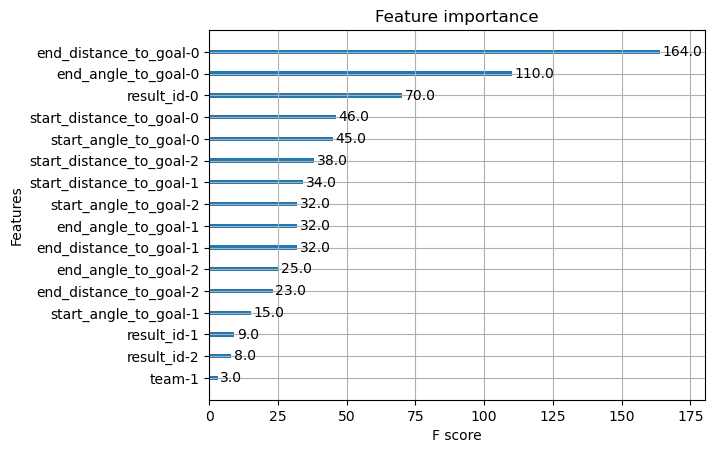

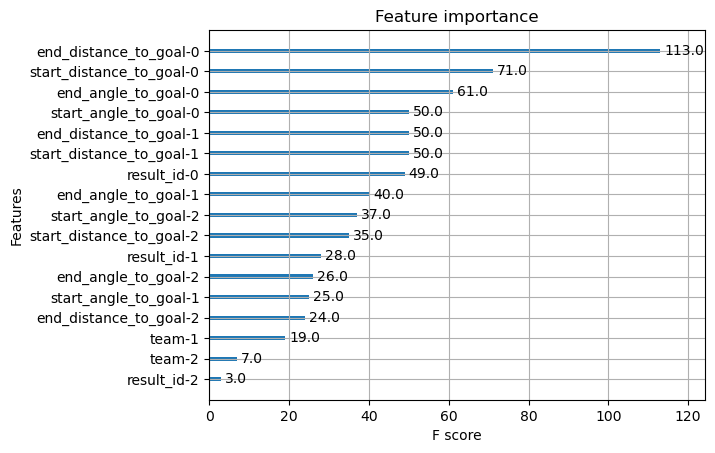

In [45]:
#INVESTIGATING FEATURE IMPORTANCES
for label in labels:
    plot_importance(models[label])

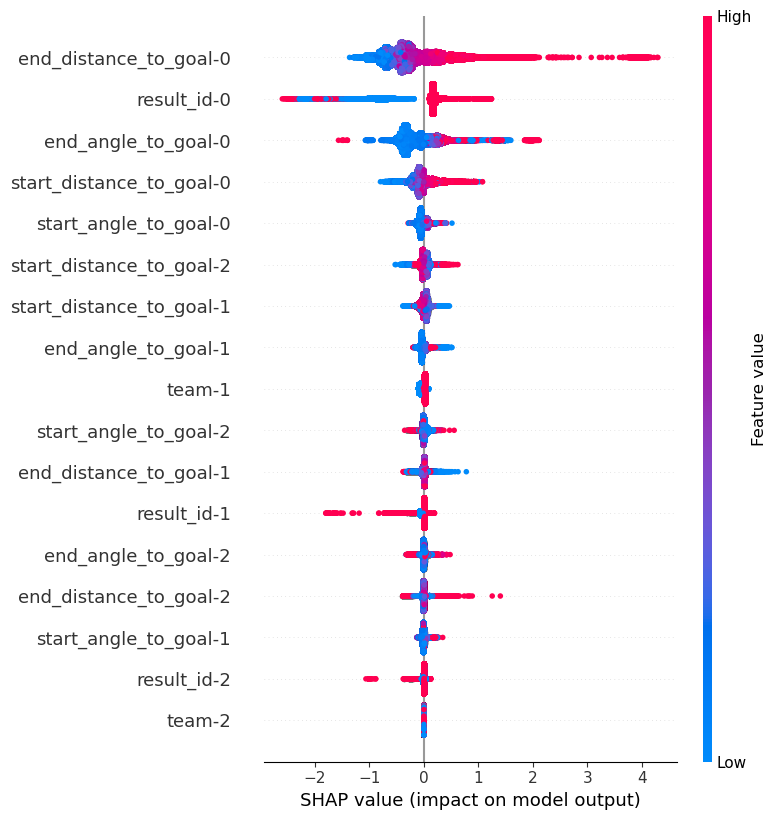

In [46]:
#INVESTIGATING SHAP VALUES
label='scores'
# label='concedes'
explainer = shap.TreeExplainer(models[label])
shap_values = explainer.shap_values(df_X_test[features])
shap.summary_plot(shap_values, df_X_test[features])

In [47]:
dfs_predictions = {}
for label in tqdm(labels):
    model = models[label]
    probabilities = model.predict_proba(
        df_X_test[features]
    )
    predictions = probabilities[:, 1]
    dfs_predictions[label] = pd.Series(predictions, index=df_X_test.index)
df_predictions = pd.concat(dfs_predictions, axis=1).reset_index(drop=True)
df_predictions.tail(10)

100%|█████████████████████████████████████████████| 2/2 [00:00<00:00,  2.55it/s]


,scores,concedes
476520,0.015853,0.002325
476521,0.011951,0.002123
476522,0.011581,0.001913
476523,0.012014,0.002082
476524,0.009959,0.001761
476525,0.019256,0.001338
476526,0.004063,0.009511
476527,0.011659,0.003019
476528,0.013970,0.003882
476529,0.010315,0.003461


In [48]:
df_actions_predictions = pd.concat([df_actions, df_predictions], axis=1)

In [49]:
df_players = _convert_players(pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/players.csv', index_col=0))
df_teams = _convert_teams(pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/teams.csv', index_col=0))
df_actions = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/actions.csv', index_col=0)

In [50]:
df_actions = ( df_actions.merge( df_players, how='left' )
              .merge( df_teams, how='left')
             )
df_actions.head()

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,...,type_name,result_name,bodypart_name,nickname,firstname,lastname,birth_date,player_name,team_name_short,team_name
0,2500089,1,2.763597,1659,9637,52.50,34.00,63.00,30.60,251700146.0,...,pass,success,foot,J. King,Joshua,King,1992-01-15,Joshua King,AFC Bournemouth,AFC Bournemouth
1,2500089,1,4.761353,1659,8351,63.00,30.60,64.05,10.20,251700147.0,...,pass,success,foot,A. Surman,Andrew,Surman,1986-08-20,Andrew Surman,AFC Bournemouth,AFC Bournemouth
2,2500089,1,5.533097,1659,9285,64.05,10.20,72.45,20.40,251700148.0,...,pass,success,foot,C. Daniels,Charlie,Daniels,1986-09-07,Charlie Daniels,AFC Bournemouth,AFC Bournemouth
3,2500089,1,7.707561,1659,239411,72.45,20.40,35.70,19.04,251700161.0,...,pass,success,foot,T. Mings,Tyrone,Mings,1993-03-19,Tyrone Mings,AFC Bournemouth,AFC Bournemouth
4,2500089,1,11.614943,1659,9637,35.70,19.04,30.45,12.24,251700149.0,...,pass,success,foot,J. King,Joshua,King,1992-01-15,Joshua King,AFC Bournemouth,AFC Bournemouth


In [51]:
df_actions_predictions = pd.concat([df_actions, df_predictions], axis=1)

In [52]:
dfs_values = []
for game_id, game_predictions in df_actions_predictions.groupby('game_id'):
    df_values = value(game_predictions, game_predictions['scores'], game_predictions['concedes'])
    
    df_all = pd.concat([game_predictions, df_values], axis=1)
    dfs_values.append(df_all)

In [53]:
df_values = (pd.concat(dfs_values)
    .sort_values(['game_id', 'period_id', 'time_seconds'])
    .reset_index(drop=True)
)

In [54]:
df_values.tail(10)

,game_id,period_id,time_seconds,team_id,player_id,start_x,start_y,end_x,end_y,original_event_id,...,lastname,birth_date,player_name,team_name_short,team_name,scores,concedes,offensive_value,defensive_value,vaep_value
2462716,2576338,2,2571.850146,3193,116269,50.40,11.56,32.55,22.4400,253567048.0,...,Laxalt Su\u00e1rez,1993-02-07,Diego Sebasti\u00e1n Laxalt Su\u00e1rez,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462717,2576338,2,2576.793672,3193,116269,32.55,22.44,23.10,34.6800,253567049.0,...,Laxalt Su\u00e1rez,1993-02-07,Diego Sebasti\u00e1n Laxalt Su\u00e1rez,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462718,2576338,2,2578.550581,3193,3548,23.10,34.68,7.35,29.2400,253567051.0,...,Rossi,1987-02-01,Giuseppe Rossi,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462719,2576338,2,2579.867806,3193,21177,7.35,29.24,0.00,37.6584,253567054.0,...,Pandev,1983-07-27,Goran Pandev,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462720,2576338,2,2615.710407,3185,283062,100.00,34.00,36.75,68.0000,253567083.0,...,Milinkovi\u0107-Savi\u0107,1997-02-20,Vanja Milinkovi\u0107-Savi\u0107,Torino,Torino FC,NaN,NaN,NaN,NaN,NaN
2462721,2576338,2,2630.727964,3193,20749,66.15,0.00,59.85,12.9200,253567059.0,...,Bertolacci,1991-01-11,Andrea Bertolacci,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462722,2576338,2,2633.465692,3193,0,59.85,12.92,42.00,14.9600,NaN,...,NaN,NaT,NaN,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462723,2576338,2,2636.203420,3193,0,42.00,14.96,39.90,12.9200,253567274.0,...,NaN,NaT,NaN,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462724,2576338,2,2637.177535,3193,116269,39.90,12.92,38.85,17.0000,253567068.0,...,Laxalt Su\u00e1rez,1993-02-07,Diego Sebasti\u00e1n Laxalt Su\u00e1rez,Genoa,Genoa CFC,NaN,NaN,NaN,NaN,NaN
2462725,2576338,2,2638.693956,3185,289827,66.15,51.00,66.15,51.0000,253567099.0,...,Bonifazi,1996-05-19,Kevin Bonifazi,Torino,Torino FC,NaN,NaN,NaN,NaN,NaN


In [55]:
#RATING PLAYERS
df_values.columns

Index(['game_id', 'period_id', 'time_seconds', 'team_id', 'player_id',
       'start_x', 'start_y', 'end_x', 'end_y', 'original_event_id',
       'bodypart_id', 'type_id', 'result_id', 'action_id', 'type_name',
       'result_name', 'bodypart_name', 'nickname', 'firstname', 'lastname',
       'birth_date', 'player_name', 'team_name_short', 'team_name', 'scores',
       'concedes', 'offensive_value', 'defensive_value', 'vaep_value'],
      dtype='object')

In [56]:
df_ranking = (df_values[['player_id', 'team_name', 'nickname', 'vaep_value']]
    .groupby(['player_id', 'team_name', 'nickname'])
    .agg(vaep_count=('vaep_value', 'count'), 
         vaep_mean=('vaep_value', 'mean'),
         vaep_sum=('vaep_value', 'sum'))
    .sort_values('vaep_sum', ascending=False)
    .reset_index()
)

In [57]:
df_ranking.head(10)

,player_id,team_name,nickname,vaep_count,vaep_mean,vaep_sum
0,107,Stoke City FC,E. Pieters,1700,0.010046,17.078548
1,8313,West Ham United FC,P. Zabaleta,2012,0.008275,16.649423
2,25854,Stoke City FC,K. Zouma,1539,0.010650,16.390060
3,8653,Leicester City FC,H. Maguire,2251,0.007212,16.235308
4,210044,Tottenham Hotspur FC,E. Dier,2609,0.006020,15.706397
5,9277,AFC Bournemouth,S. Cook,1756,0.008736,15.339918
6,55979,Huddersfield Town FC,M. J\u00f8rgensen,2039,0.007369,15.024745
7,167145,Arsenal FC,Beller\u00edn,2572,0.005780,14.865426
8,61390,Brighton & Hove Albion FC,M. Ryan,1314,0.011168,14.674227
9,25553,Chelsea FC,Azpilicueta,3269,0.004463,14.588001


In [59]:
df_player_games = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv', index_col=0)
df_player_games = df_player_games[df_player_games['game_id'].isin(df_games['game_id'])]

In [60]:
df_minutes_played = (df_player_games[['player_id', 'minutes_played']]
    .groupby('player_id')
    .sum()
    .reset_index()
)

In [61]:
df_minutes_played.head()

,player_id,minutes_played
0,12,190
1,33,93
2,36,2304
3,38,387
4,45,317


In [62]:
df_ranking_p90 = df_ranking.merge(df_minutes_played)
df_ranking_p90['vaep_rating'] = df_ranking_p90['vaep_sum'] * 90 / df_ranking_p90['minutes_played']
df_ranking_p90['actions_p90'] = df_ranking_p90['vaep_count'] * 90 / df_ranking_p90['minutes_played']

In [63]:
MIN_THRESHOLD = 450

In [64]:
df_ranking_p90 = df_ranking_p90[df_ranking_p90['minutes_played']>MIN_THRESHOLD]

In [66]:
df_ranking_p90 = df_ranking_p90.sort_values('vaep_rating', ascending=False)
df_ranking_p90.head(10)

,player_id,team_name,nickname,vaep_count,vaep_mean,vaep_sum,minutes_played,vaep_rating,actions_p90
82,9280,Huddersfield Town FC,S. Malone,897,0.012068,10.825326,1216,0.801217,66.389803
308,217078,Leicester City FC,D. Amartey,352,0.011374,4.003824,516,0.698341,61.395349
253,486252,Crystal Palace FC,A. Wan-Bissaka,429,0.011836,5.077620,661,0.691355,58.411498
183,9164,Burnley FC,C. Taylor,607,0.011905,7.226637,1012,0.642685,53.982213
205,279717,Arsenal FC,A. Maitland-Niles,805,0.008385,6.749973,991,0.613015,73.107972
46,3436,Newcastle United FC,Javi Manquillo,1003,0.012304,12.340897,1872,0.593312,48.221154
71,346101,Liverpool FC,T. Alexander-Arnold,1461,0.007663,11.195260,1748,0.576415,75.223112
251,240070,Tottenham Hotspur FC,H. Winks,740,0.007105,5.258041,834,0.567414,79.856115
59,340,Everton FC,Cuco Martina,1355,0.008718,11.812880,1933,0.550005,63.088464
70,29640,Southampton FC,M. Lemina,1313,0.008568,11.249370,1846,0.548453,64.014085


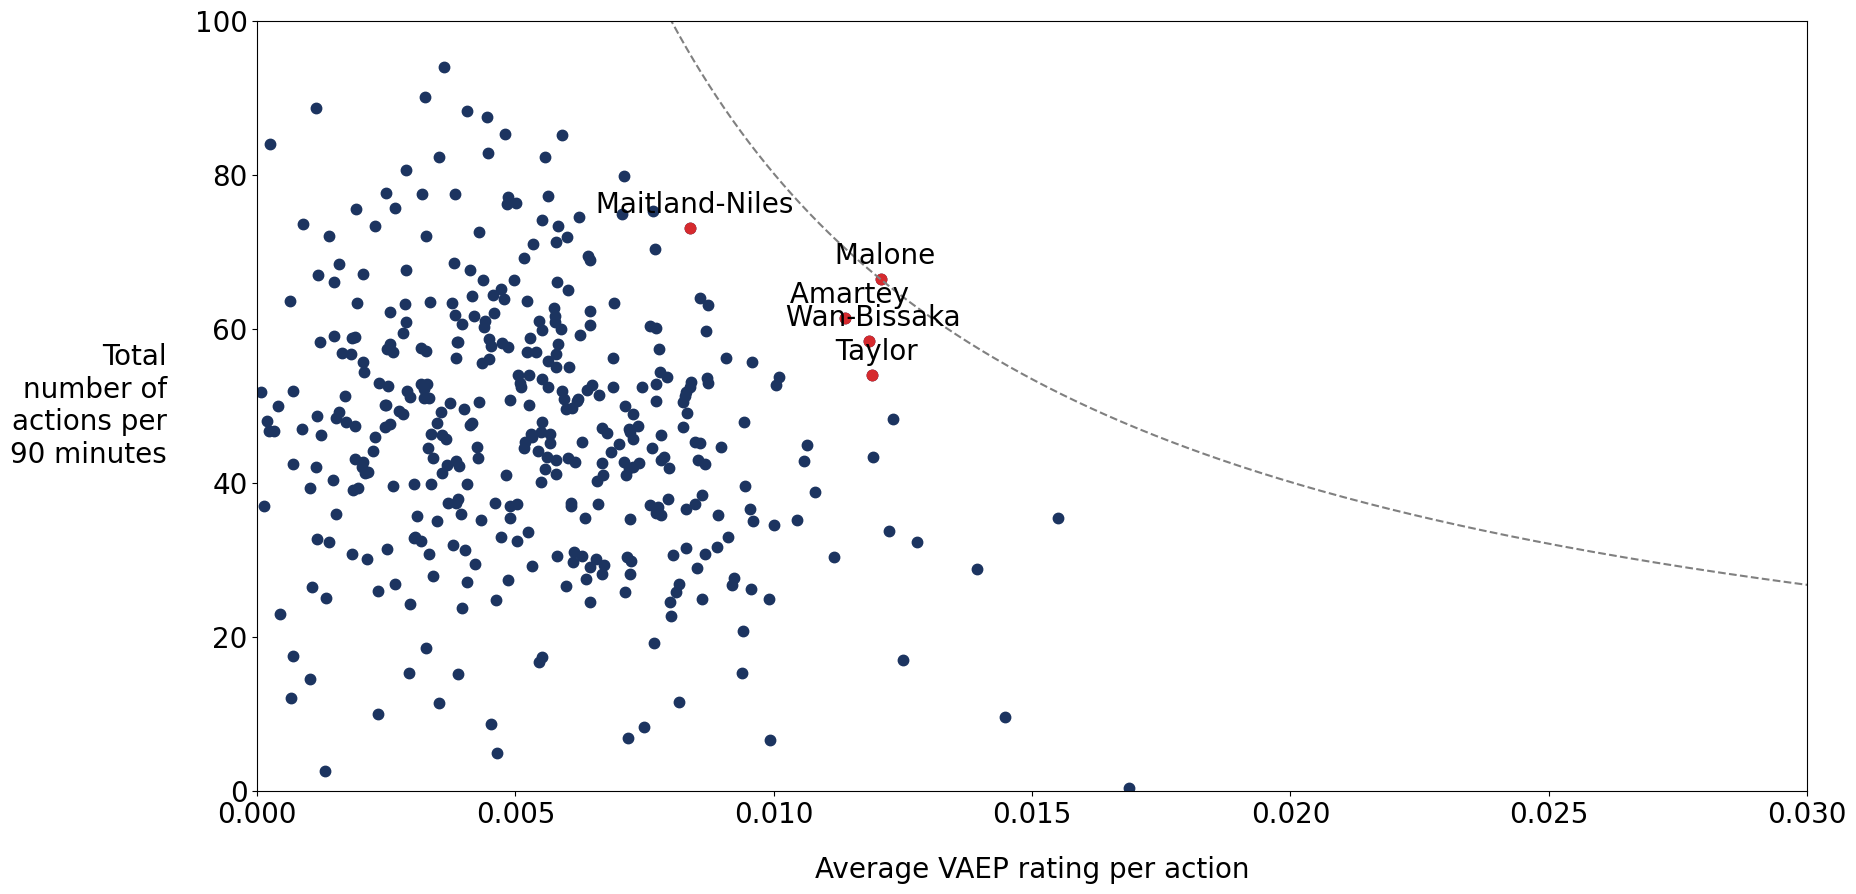

In [67]:
#QUANTITY-QUALITY TRADE OFF
plt.figure(figsize=(20, 10))
x = list(df_ranking_p90['vaep_mean'])
y = list(df_ranking_p90['actions_p90'])
plt.plot(x, y, '.', c='#1C3460', markersize=15)

# Plot 5 best players
x_best = list(df_ranking_p90['vaep_mean'][0:5])
y_best = list(df_ranking_p90['actions_p90'][0:5])
names = list(df_ranking_p90['nickname'][0:5])
names = [name.split(".")[-1] for name in names]
plt.plot(x_best, y_best, '.', c='#D62A2E', markersize=15)
for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i] + 2), fontsize=20, horizontalalignment='center')

best_player = x[0] * y[0]
yi = np.arange(0.1, 100, 0.1)
xi = [best_player / i for i in yi]
plt.plot(xi, yi, '--', c='grey')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(0, 0.03)
plt.ylim(0, 100)
plt.xlabel('Average VAEP rating per action', labelpad=20, fontsize=20)
plt.ylabel('Total\nnumber of\nactions per\n90 minutes', rotation=0, labelpad=20,
            verticalalignment='center', horizontalalignment='right', fontsize=20)

plt.show()

In [68]:
df_risk = pd.pivot_table(df_values, values='vaep_value', index=['player_id', 'nickname', 'team_name'],
                                              columns=['result_name'], aggfunc=np.sum,
                                              fill_value=0)[['success', 'fail']]
df_risk = df_risk.reset_index()
df_risk = df_risk[0:-1]
df_risk = pd.merge(df_risk, df_minutes_played, on=['player_id'])
for result in ['success', 'fail']:
    df_risk[result] = df_risk[result] / df_risk['minutes_played'] * 90
df_risk.head()

/var/folders/x9/66v30vmj1w7bc7k3zz3xtp5m0000gn/T/ipykernel_6848/1198301325.py:1: FutureWarning: The provided callable <function sum at 0x10b07a3e0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_risk = pd.pivot_table(df_values, values='vaep_value', index=['player_id', 'nickname', 'team_name'],


,player_id,nickname,team_name,success,fail,minutes_played
0,12,K. Omeruo,Nigeria,0.000000,0.000000,190
1,33,J. Cillessen,FC Barcelona,0.000000,0.000000,93
2,36,T. Alderweireld,Belgium,0.000000,0.000000,2304
3,36,T. Alderweireld,Tottenham Hotspur FC,0.176850,0.071555,2304
4,38,D. Blind,Manchester United FC,-0.008468,0.002077,387


In [69]:
df_risk = df_risk[df_risk['minutes_played']>MIN_THRESHOLD]
df_risk['vaep_rating'] = df_risk['success'] + df_risk['fail']
df_risk.sort_values('fail')

,player_id,nickname,team_name,success,fail,minutes_played,vaep_rating
755,9532,S. Berahino,Stoke City FC,0.057184,-0.143932,548,-0.086747
728,8981,W. Hughes,Watford FC,0.255240,-0.132984,1046,0.122256
751,9414,M. Phillips,West Bromwich Albion FC,0.193031,-0.106691,2234,0.086340
1990,61961,B. Kayal,Brighton & Hove Albion FC,0.159645,-0.100331,809,0.059314
1854,41174,M. Lanzini,West Ham United FC,0.166837,-0.087933,2191,0.078904
...,...,...,...,...,...,...,...
2974,268776,W. Hoedt,Southampton FC,0.097013,0.232648,2702,0.329661
2922,258162,Renato Sanches,Swansea City AFC,0.216572,0.235304,1179,0.451875
51,340,Cuco Martina,Everton FC,0.307050,0.242383,1933,0.549432
3236,339789,Mikel Merino,Newcastle United FC,0.107441,0.249435,1441,0.356876


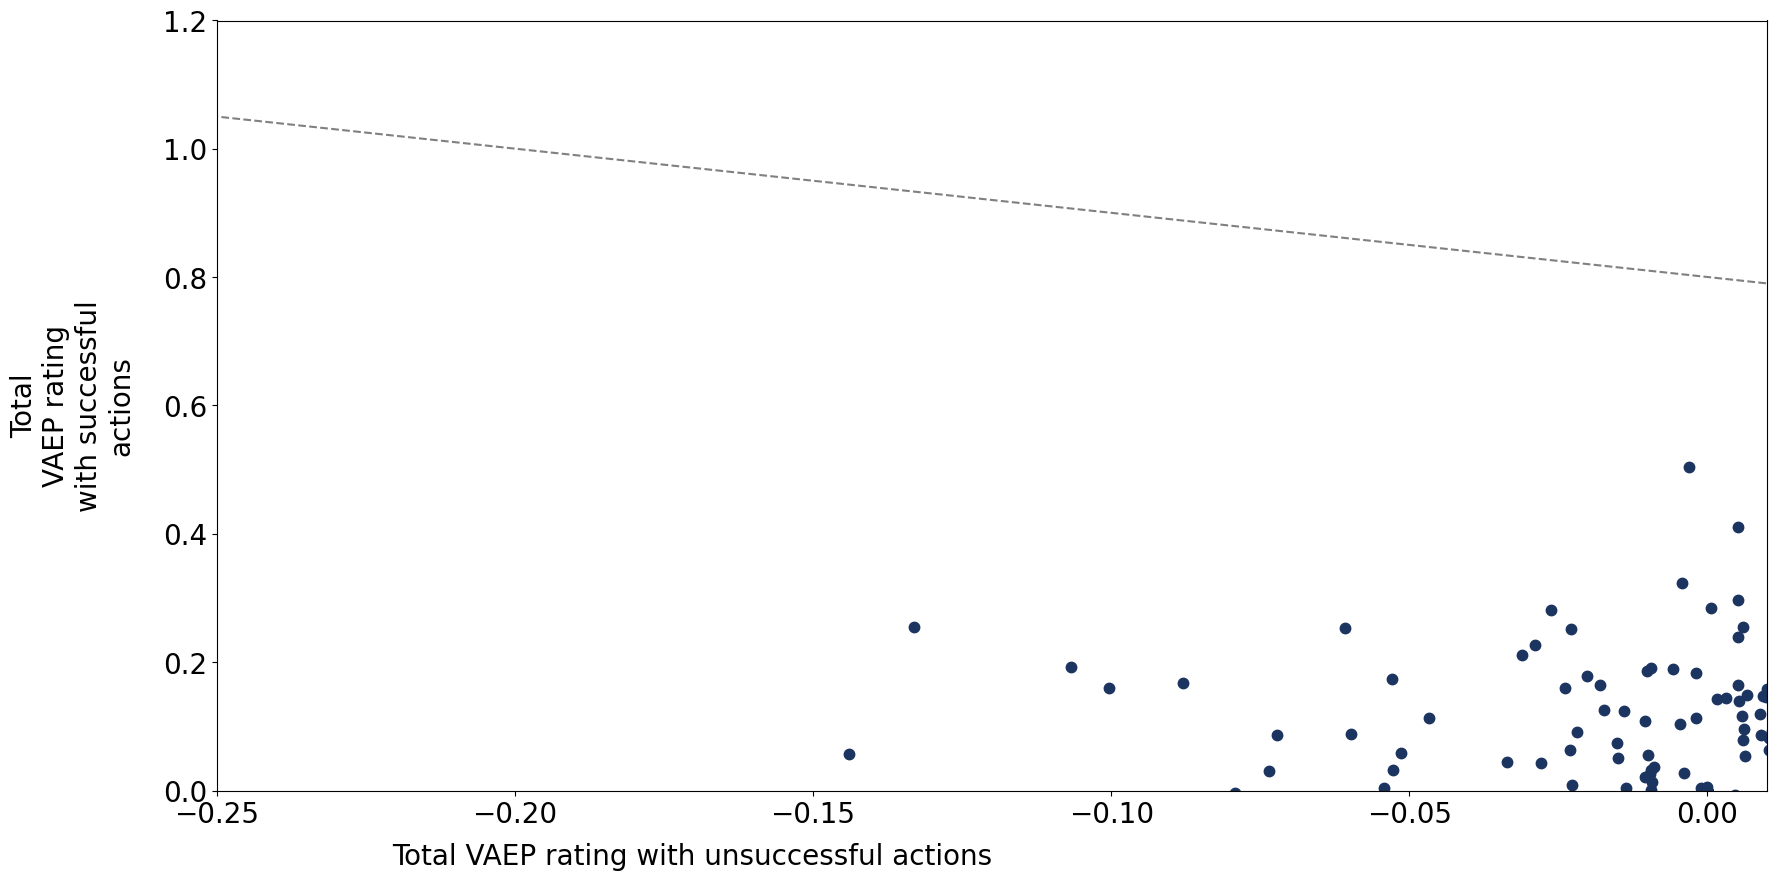

In [70]:
#RISK REWARD TRADE OFF
df_risk = df_risk.sort_values('vaep_rating', ascending=False)
plt.figure(figsize=(20, 10))
x = list(df_risk['fail'])
y = list(df_risk['success'])
plt.plot(x, y, '.', c='#1C3460', markersize=15)

# Plot 5 best players
x_best = list(df_risk['fail'][0:5])
y_best = list(df_risk['success'][0:5])
names = list(df_risk['nickname'][0:5])
names = [name.split(".")[-1] for name in names]
plt.plot(x_best, y_best, '.', c='#D62A2E', markersize=15)
for i, txt in enumerate(names):
    plt.annotate(txt, (x[i], y[i] + 0.01), fontsize=20, horizontalalignment='center')

best_player = x[0] + y[0]
yi = np.arange(0.1, 2, 0.1)
xi = [best_player - i for i in yi]
plt.plot(xi, yi, '--', c='grey')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim(-0.25, 0.01)
plt.ylim(0, 1.2)
plt.xlabel('Total VAEP rating with unsuccessful actions', rotation=0, labelpad=20,
            verticalalignment='center', horizontalalignment='right', fontsize=20)
plt.ylabel('Total\nVAEP rating\nwith successful\nactions', labelpad=20, fontsize=20)
plt.show()

In [72]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 kB 9.4 MB/s eta 0:00:00


In [73]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer


import warnings
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [74]:
england = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/events_England.csv')
player_role = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/playerank.csv')

england['subEventName'] = england['subEventName'].fillna('Offside')
england['subEventId'] = england['subEventId'].fillna(60)

In [75]:
england.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id,tagsList,pos_orig_y,pos_orig_x,pos_dest_y,pos_dest_x
0,8,Simple pass,[{'id': 1801}],25413,"[{'y': 49, 'x': 49}, {'y': 78, 'x': 31}]",2499719,Pass,1609,1H,2.758649,85.0,177959171,[1801],49,49,78,31
1,8,High pass,[{'id': 1801}],370224,"[{'y': 78, 'x': 31}, {'y': 75, 'x': 51}]",2499719,Pass,1609,1H,4.946850,83.0,177959172,[1801],78,31,75,51
2,8,Head pass,[{'id': 1801}],3319,"[{'y': 75, 'x': 51}, {'y': 71, 'x': 35}]",2499719,Pass,1609,1H,6.542188,82.0,177959173,[1801],75,51,71,35
3,8,Head pass,[{'id': 1801}],120339,"[{'y': 71, 'x': 35}, {'y': 95, 'x': 41}]",2499719,Pass,1609,1H,8.143395,82.0,177959174,[1801],71,35,95,41
4,8,Simple pass,[{'id': 1801}],167145,"[{'y': 95, 'x': 41}, {'y': 88, 'x': 72}]",2499719,Pass,1609,1H,10.302366,85.0,177959175,[1801],95,41,88,72


In [78]:
#CHECKING ALL THE PLAYER ROLES
print('-------- ALL ROLES ---------')
for role in player_role['roleCluster'].unique():
    print(role)
print('-------- FW  ROLES ---------')
fw_roles = [role for role in player_role['roleCluster'].unique() if 'FW' in role]
for role in fw_roles:
    print(role)

-------- ALL ROLES ---------
right CB
central MF
left CB
left FW-left MF
left FW
left MF
central FW
right FW
central MF-left FW
right MF-right FW
right MF
left CB-left MF
central MF-central FW
central MF-right FW
central MF-central FW-right FW
central FW-left FW
right MF-right CB
right MF-central MF
central MF-right CB
right CB-left CB
central MF-left CB
right CB-central MF-left CB
right FW-central FW
right MF-central MF-right CB
central MF-left FW-left MF
central MF-left CB-left MF
-------- FW  ROLES ---------
left FW-left MF
left FW
central FW
right FW
central MF-left FW
right MF-right FW
central MF-central FW
central MF-right FW
central MF-central FW-right FW
central FW-left FW
right FW-central FW
central MF-left FW-left MF


In [79]:
main_fw = ['central FW','left FW','right FW','central MF-central FW'] # There was many sub FW role. so I would like to continue with main FW roles.
player_role = player_role[player_role['roleCluster'].isin(main_fw)]

england = england[['matchId','playerId','eventId','subEventId','eventName','subEventName']]
player_role = player_role[['matchId','playerId','roleCluster','goalScored','minutesPlayed']]

In [80]:
england.head()

,matchId,playerId,eventId,subEventId,eventName,subEventName
0,2499719,25413,8,85.0,Pass,Simple pass
1,2499719,370224,8,83.0,Pass,High pass
2,2499719,3319,8,82.0,Pass,Head pass
3,2499719,120339,8,82.0,Pass,Head pass
4,2499719,167145,8,85.0,Pass,Simple pass


In [81]:
player_role.head()

,matchId,playerId,roleCluster,goalScored,minutesPlayed
21,2576172,10113,left FW,0,90
33,1694398,101568,left FW,0,14
34,1694401,101568,central FW,0,52
49,2057954,101590,central FW,0,24
50,2058012,101590,central FW,0,18


In [83]:
match_fw = pd.pivot_table(data=england, index=['matchId','playerId'], columns='subEventName', values='subEventId', aggfunc='count' ).reset_index()
pd.pivot_table(data=england, index=['matchId','playerId'], columns='subEventName', values='subEventId', aggfunc='count' )

subEventName      Acceleration  Air duel  Ball out of the field  Clearance  \
matchId playerId                                                             
2499719 0                  NaN      16.0                   84.0        NaN   
        3319               NaN       NaN                    NaN        NaN   
        3560               NaN       8.0                    NaN        3.0   
        7868               4.0       7.0                    NaN        3.0   
        7870               NaN       1.0                    NaN        NaN   
...                        ...       ...                    ...        ...   
2500098 86325              NaN       NaN                    NaN        4.0   
        145692             NaN       8.0                    NaN        NaN   
        265318             2.0       3.0                    NaN        1.0   
        353236             NaN       1.0                    NaN        NaN   
        379209             2.0       6.0                    NaN        1.0   

subEventName      Corner  Cross  Foul  Free Kick  Free kick cross  \
matchId playerId                                                    
2499719 0            1.0    NaN   NaN        3.0              NaN   
        3319         1.0    4.0   NaN        2.0              NaN   
        3560         NaN    NaN   NaN        NaN              NaN   
        7868         NaN    8.0   1.0        1.0              NaN   
        7870         NaN    NaN   NaN        NaN              NaN   
...                  ...    ...   ...        ...              ...   
2500098 86325        NaN    NaN   1.0        NaN              NaN   
        145692       NaN    1.0   1.0        NaN              NaN   
        265318       NaN    1.0   1.0        NaN              NaN   
        353236       4.0    1.0   2.0        NaN              1.0   
        379209       NaN    NaN   NaN        NaN              NaN   

subEventName      Free kick shot  Goal kick  Goalkeeper leaving line  \
matchId playerId                                                       
2499719 0                    NaN        NaN                      NaN   
        3319                 NaN        NaN                      NaN   
        3560                 NaN        NaN                      NaN   
        7868                 NaN        NaN                      NaN   
        7870                 NaN        NaN                      NaN   
...                          ...        ...                      ...   
2500098 86325                NaN        NaN                      NaN   
        145692               NaN        NaN                      NaN   
        265318               NaN        NaN                      NaN   
        353236               NaN        NaN                      NaN   
        379209               NaN        NaN                      NaN   

subEventName      Ground attacking duel  Ground defending duel  \
matchId playerId                                                 
2499719 0                          28.0                    9.0   
        3319                        9.0                    5.0   
        3560                        1.0                    4.0   
        7868                       18.0                    8.0   
        7870                        3.0                    1.0   
...                                 ...                    ...   
2500098 86325                       NaN                    1.0   
        145692                     17.0                    3.0   
        265318                      4.0                   11.0   
        353236                      3.0                    9.0   
        379209                      NaN                    5.0   

subEventName      Ground loose ball duel  Hand foul  Hand pass  Head pass  \
matchId playerId                                                            
2499719 0                           19.0        NaN        NaN        NaN   
        3319                         2.0        NaN        N

In [84]:
match_fw_role = match_fw.merge(player_role, on=['matchId','playerId'], how='inner')
match_fw_role = match_fw_role.fillna(0)
match_fw_role

,matchId,playerId,Acceleration,Air duel,Ball out of the field,Clearance,Corner,Cross,Foul,Free Kick,Free kick cross,Free kick shot,Goal kick,Goalkeeper leaving line,Ground attacking duel,Ground defending duel,Ground loose ball duel,Hand foul,Hand pass,Head pass,High pass,Late card foul,Launch,Offside,Out of game foul,Penalty,Protest,Reflexes,Save attempt,Shot,Simple pass,Simulation,Smart pass,Throw in,Time lost foul,Touch,Violent Foul,Whistle,roleCluster,goalScored,minutesPlayed
0,2499719,3319,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2.0,0.0,0.0,0.0,0.0,9.0,5.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,72.0,0.0,1.0,0.0,0.0,4.0,0.0,0.0,central FW,0,90
1,2499719,7870,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,8.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,central FW,1,23
2,2499719,7945,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,11.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3.0,16.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,left FW,1,75
3,2499719,8013,1.0,2.0,0.0,3.0,1.0,7.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,5.0,4.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,2.0,0.0,0.0,5.0,0.0,0.0,left FW,0,88
4,2499719,12829,0.0,8.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,8.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,central FW,2,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,2500098,32636,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,central FW,0,61
2915,2500098,41174,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,12.0,0.0,3.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,52.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,central FW,2,86
2916,2500098,70965,1.0,2.0,0.0,0.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,47.0,0.0,2.0,0.0,0.0,4.0,0.0,0.0,central FW,0,90
2917,2500098,145692,0.0,8.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,17.0,3.0,3.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,21.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,central FW,1,90


In [85]:
total_performances = match_fw_role.drop('matchId',axis=1).groupby('playerId').sum()
total_performances = total_performances[total_performances['minutesPlayed']>90]
total_performances = total_performances.drop('roleCluster',axis=1)
total_performances['90min_count'] = total_performances['minutesPlayed']/90 # scale for per 90min
total_performances = total_performances.iloc[:,:-2].div(total_performances['90min_count'], axis=0) # scale values for per 90min
columns = [
'Shot','goalScored','Offside',
'Air duel','Ground attacking duel', 'Ground defending duel','Ground loose ball duel',
'Acceleration','Touch',
'Cross','High pass','Launch','Simple pass','Smart pass']
total_performances = total_performances[columns]
total_performances.head() # Overall performances of players

,Shot,goalScored,Offside,Air duel,Ground attacking duel,Ground defending duel,Ground loose ball duel,Acceleration,Touch,Cross,High pass,Launch,Simple pass,Smart pass
playerId,,,,,,,,,,,,,,
54,2.532982,0.237467,0.039578,1.187335,7.163588,4.591029,3.007916,1.068602,6.372032,3.759894,4.195251,0.277045,48.126649,3.126649
93,1.695519,0.045825,0.091650,3.299389,9.623218,4.903259,2.978615,0.916497,3.620163,4.032587,1.374745,0.504073,19.017312,0.641548
116,2.337662,0.194805,0.389610,2.922078,9.545455,3.311688,2.337662,1.168831,4.090909,0.779221,1.948052,0.194805,37.597403,0.974026
120,1.267606,0.000000,1.267606,2.535211,8.239437,3.802817,4.436620,2.535211,1.901408,2.535211,0.633803,0.000000,11.408451,1.901408
173,2.371889,0.131772,0.197657,2.306003,18.579795,5.468521,4.019034,2.701318,6.259151,4.743777,0.658858,0.000000,26.024890,1.185944


In [86]:
total_performances.describe([.10, .25, .50, .75, .90,])

,Shot,goalScored,Offside,Air duel,Ground attacking duel,Ground defending duel,Ground loose ball duel,Acceleration,Touch,Cross,High pass,Launch,Simple pass,Smart pass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.963358,0.229740,0.419812,5.185226,11.063465,4.684729,4.191746,1.029601,4.424826,2.645404,1.567293,0.172113,29.887203,1.216645
std,0.952803,0.247125,0.442712,4.883630,4.906644,2.009060,2.001286,0.848066,1.538994,2.192328,1.588862,0.234517,16.181668,0.931893
min,0.000000,0.000000,0.000000,0.000000,1.276596,0.620690,0.000000,0.000000,1.011236,0.000000,0.000000,0.000000,7.440074,0.000000
10%,0.887647,0.000000,0.000000,1.121068,5.142857,2.226596,2.003123,0.000000,2.519569,0.499741,0.196903,0.000000,13.459168,0.242345
25%,1.286527,0.000000,0.000000,2.000928,7.740990,3.321718,2.833572,0.344331,3.375401,1.008414,0.430692,0.000000,18.546931,0.559006
50%,1.884628,0.166822,0.307037,3.378271,10.618554,4.427008,3.856947,0.900000,4.265352,2.190276,1.097662,0.075578,26.879636,1.012147
75%,2.537460,0.390051,0.665537,6.006726,13.877241,5.933882,5.342337,1.588919,5.435540,3.692048,2.226348,0.281415,35.200591,1.585913
90%,3.197950,0.554838,0.991274,12.984133,17.245715,6.995168,6.879607,2.083723,6.358860,5.348292,3.612201,0.498352,51.774522,2.348460
max,5.070423,1.395349,2.400000,24.100418,34.390244,12.439024,12.600000,4.921875,9.349939,12.333333,9.551020,1.333333,96.382979,4.923767


<Axes: >

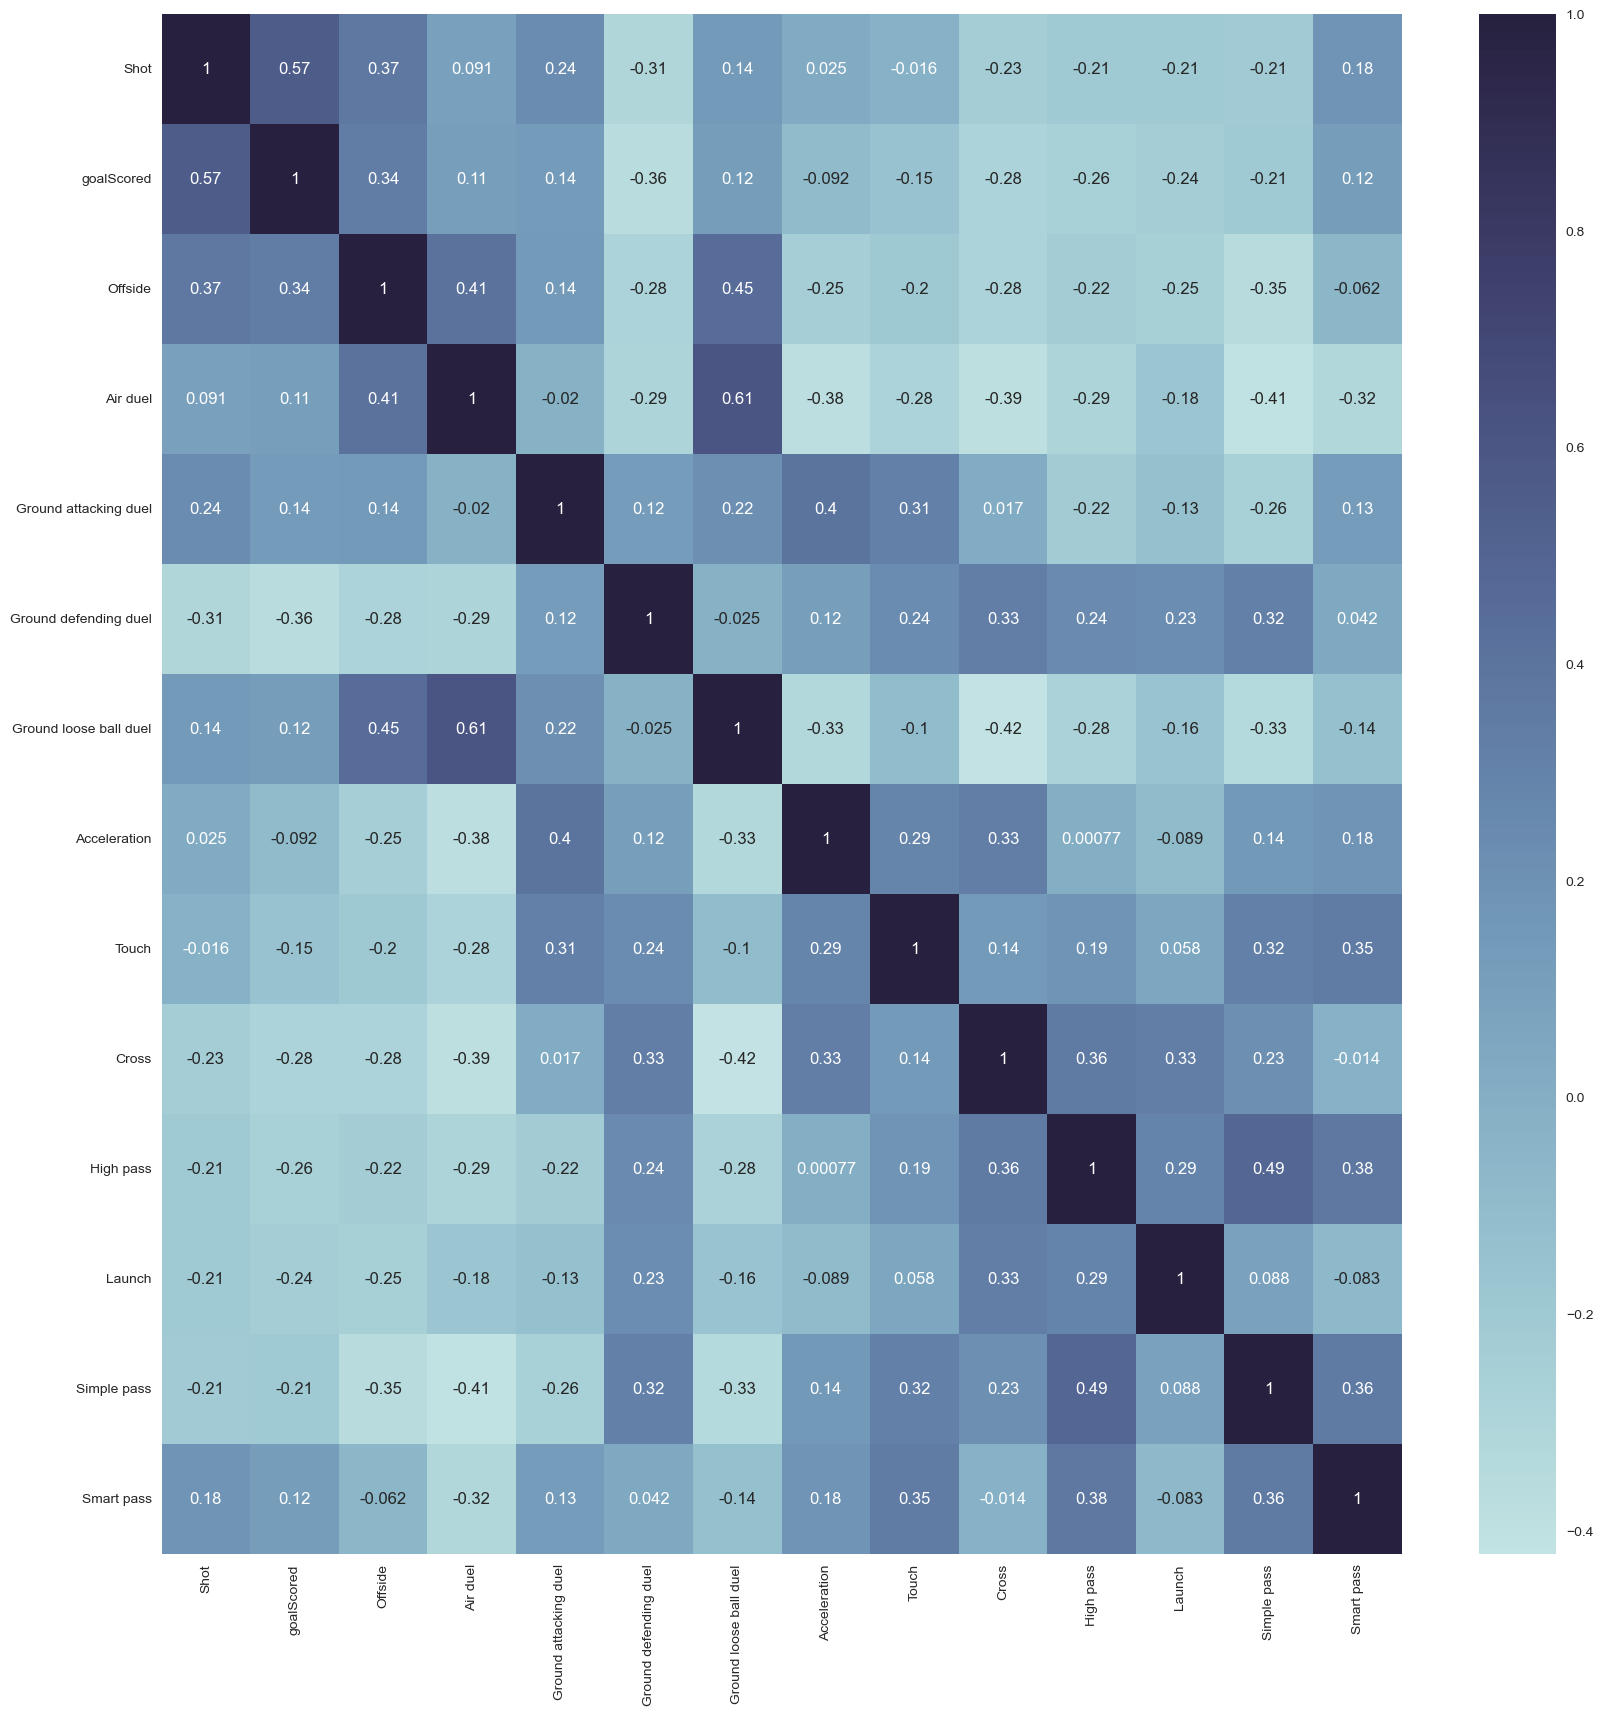

In [87]:
plt.figure(figsize=(20,20))  
sns.heatmap(total_performances.corr(),annot=True, cmap=sns.color_palette("ch:start=.2,rot=-.3", as_cmap=True))

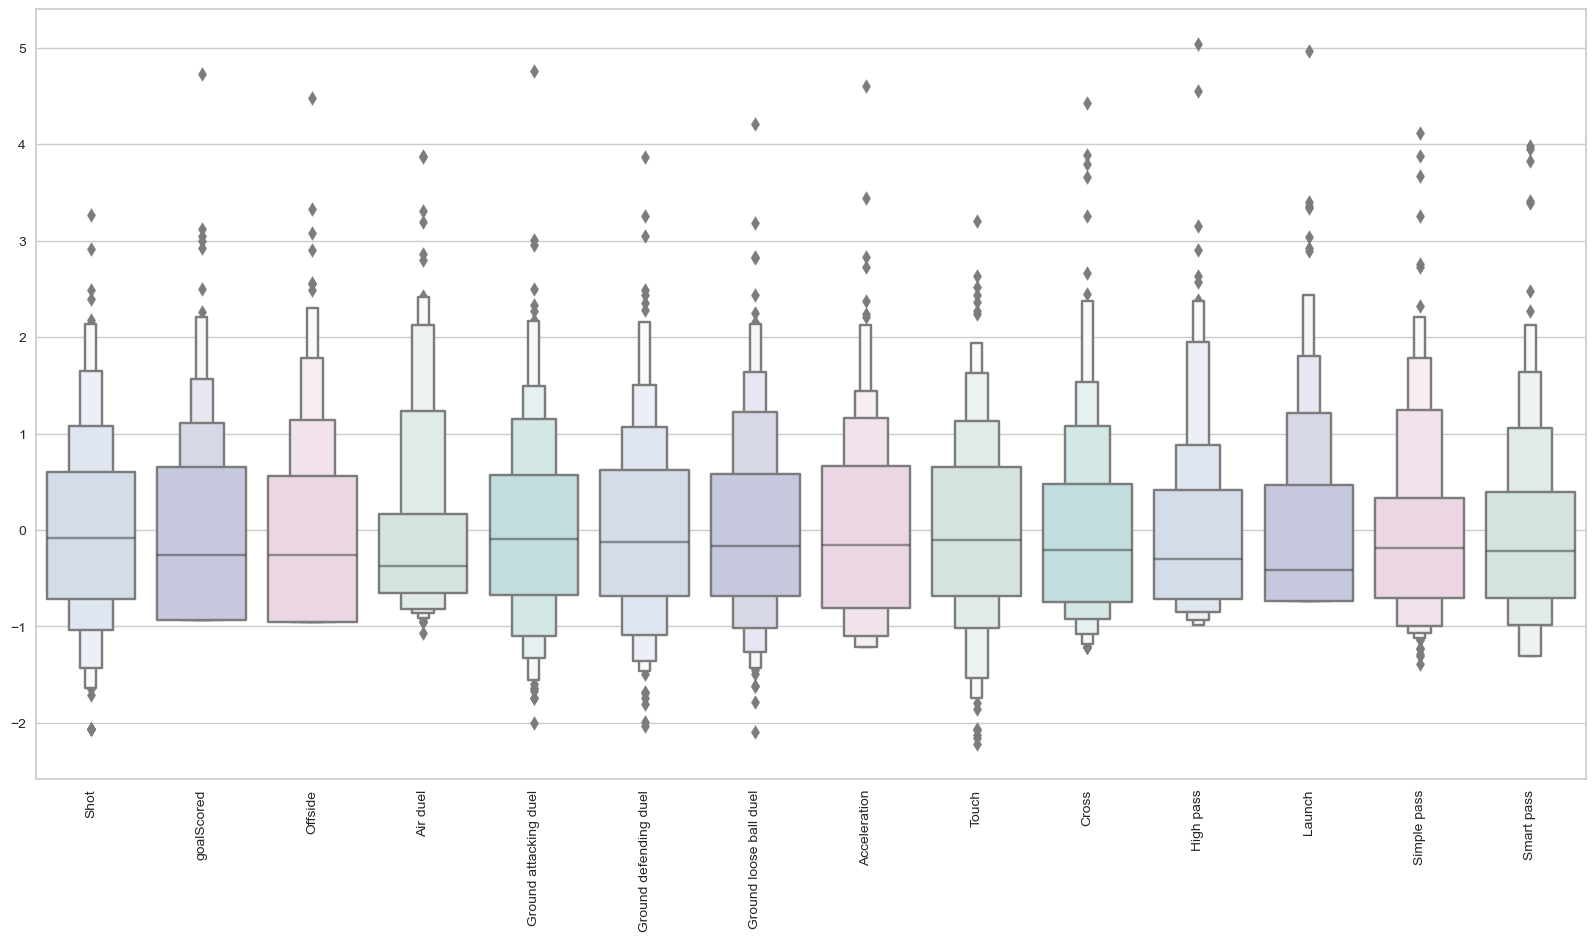

In [88]:
# Prepairing attributes of scale data
features = total_performances

#Set up a standard scaler for the features
col_names = list(features.columns)
s_scaler = StandardScaler()
features = s_scaler.fit_transform(features)
features = pd.DataFrame(features, columns=col_names) 

#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [89]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])

    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0

    return H

**Hopkins Hypothesis:**

-Null hypothesis (Ho): the data set D is uniformly distributed (i.e., no meaningful clusters)

-Alternative hypothesis(H1): the data set D is not uniformly distributed (i.e., contains meaningful clusters)

In [90]:
hopkins(total_performances)

0.771936188867402

If H < 0.5, then it is unlikely that D has statistically significant clusters.
If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data
Hopkins score > 0.5 so Ho hypothesis rejected. "It indicate a tendency of data to cluster."

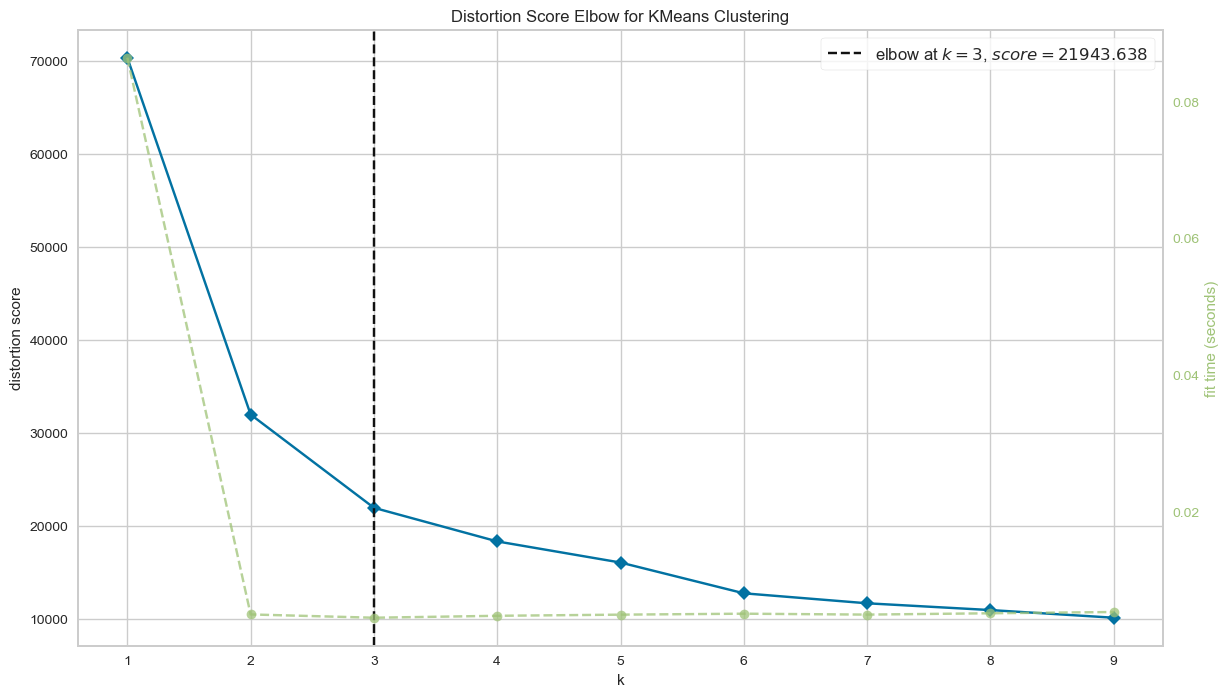

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [91]:
#BY USING THE K-MEANS ELBOW METHOD
plt.rcParams['figure.facecolor'] = 'white'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10))

plt.figure(figsize=(14, 8))
visualizer.fit(total_performances)        # Fit the data to the visualizer
visualizer.show()

In [92]:
ssd =[]

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(total_performances)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(total_performances, model.labels_)}')

Silhouette Score for 2 clusters: 0.5511777816548095
Silhouette Score for 3 clusters: 0.3461239072907426
Silhouette Score for 4 clusters: 0.2929801223180144
Silhouette Score for 5 clusters: 0.2709109217954508
Silhouette Score for 6 clusters: 0.2737114390200022
Silhouette Score for 7 clusters: 0.2644540760778042
Silhouette Score for 8 clusters: 0.24725341670141385
Silhouette Score for 9 clusters: 0.23142310878651928


n = 2


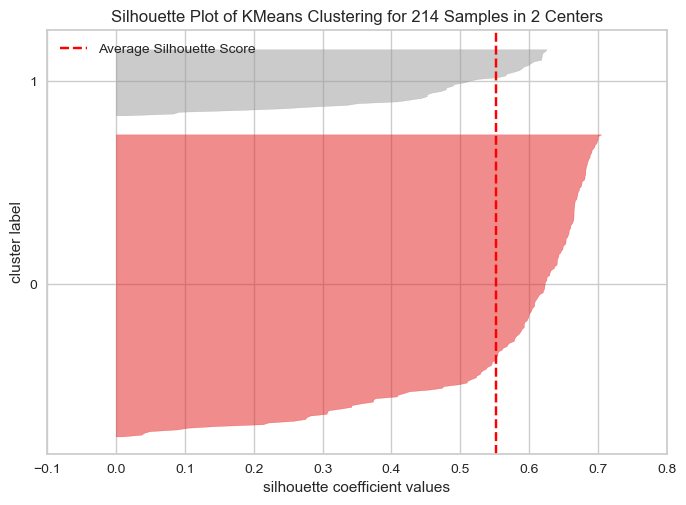

n = 3


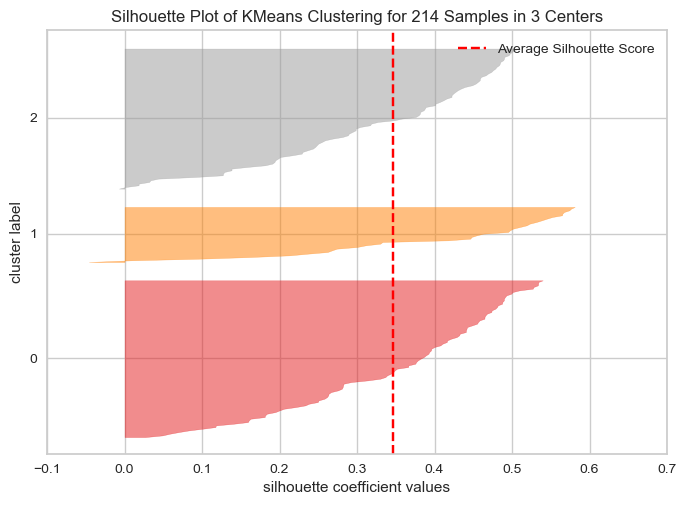

In [94]:
for n in range(2,4):
    print(f'n = {n}')
    model_3 = KMeans(n_clusters=n, random_state=42)
    visualizer = SilhouetteVisualizer(model_3)

    visualizer.fit(total_performances)    # Fit the data to the visualizer
    visualizer.poof();

In [95]:
#TRYING THE SAME THING BUT NOW WITH ADJUSTED ATTRIBUTES
total_performances_agg = match_fw_role.drop('matchId',axis=1).groupby('playerId').sum()
total_performances_agg = total_performances_agg[total_performances_agg['minutesPlayed']>90]
total_performances_agg = total_performances_agg.drop('roleCluster',axis=1)

# Add calculated attributes for actions
total_performances_agg['totalDuel'] = total_performances_agg['Air duel'] + total_performances_agg['Ground attacking duel'] + total_performances_agg['Ground defending duel'] + total_performances_agg['Ground loose ball duel']
total_performances_agg['totalPass'] = total_performances_agg['Simple pass'] + total_performances_agg['High pass'] + total_performances_agg['Smart pass'] + total_performances_agg['Launch'] + total_performances_agg['Cross']

total_performances_agg['90min_count'] = total_performances_agg['minutesPlayed']/90
total_performances_agg = total_performances_agg.iloc[:,:].div(total_performances_agg['90min_count'], axis=0) # scale values for per 90min
columns = [
'Shot','goalScored','Offside',
'totalDuel',
'Acceleration','Touch',
'totalPass']
total_performances_agg = total_performances_agg[columns]
total_performances_agg.head()

,Shot,goalScored,Offside,totalDuel,Acceleration,Touch,totalPass
playerId,,,,,,,
54,2.532982,0.237467,0.039578,15.949868,1.068602,6.372032,59.485488
93,1.695519,0.045825,0.091650,20.804481,0.916497,3.620163,25.570265
116,2.337662,0.194805,0.389610,18.116883,1.168831,4.090909,41.493506
120,1.267606,0.000000,1.267606,19.014085,2.535211,1.901408,16.478873
173,2.371889,0.131772,0.197657,30.373353,2.701318,6.259151,32.613470


In [96]:
total_performances_agg.describe([.10, .25, .50, .75, .90,])

,Shot,goalScored,Offside,totalDuel,Acceleration,Touch,totalPass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.963358,0.229740,0.419812,25.125165,1.029601,4.424826,35.488658
std,0.952803,0.247125,0.442712,8.226820,0.848066,1.538994,18.086988
min,0.000000,0.000000,0.000000,6.827586,0.000000,1.011236,9.456907
10%,0.887647,0.000000,0.000000,15.573237,0.000000,2.519569,15.893846
25%,1.286527,0.000000,0.000000,19.764219,0.344331,3.375401,23.452390
50%,1.884628,0.166822,0.307037,24.025862,0.900000,4.265352,32.081176
75%,2.537460,0.390051,0.665537,29.862069,1.588919,5.435540,41.923145
90%,3.197950,0.554838,0.991274,36.109117,2.083723,6.358860,62.498943
max,5.070423,1.395349,2.400000,62.400000,4.921875,9.349939,100.851064


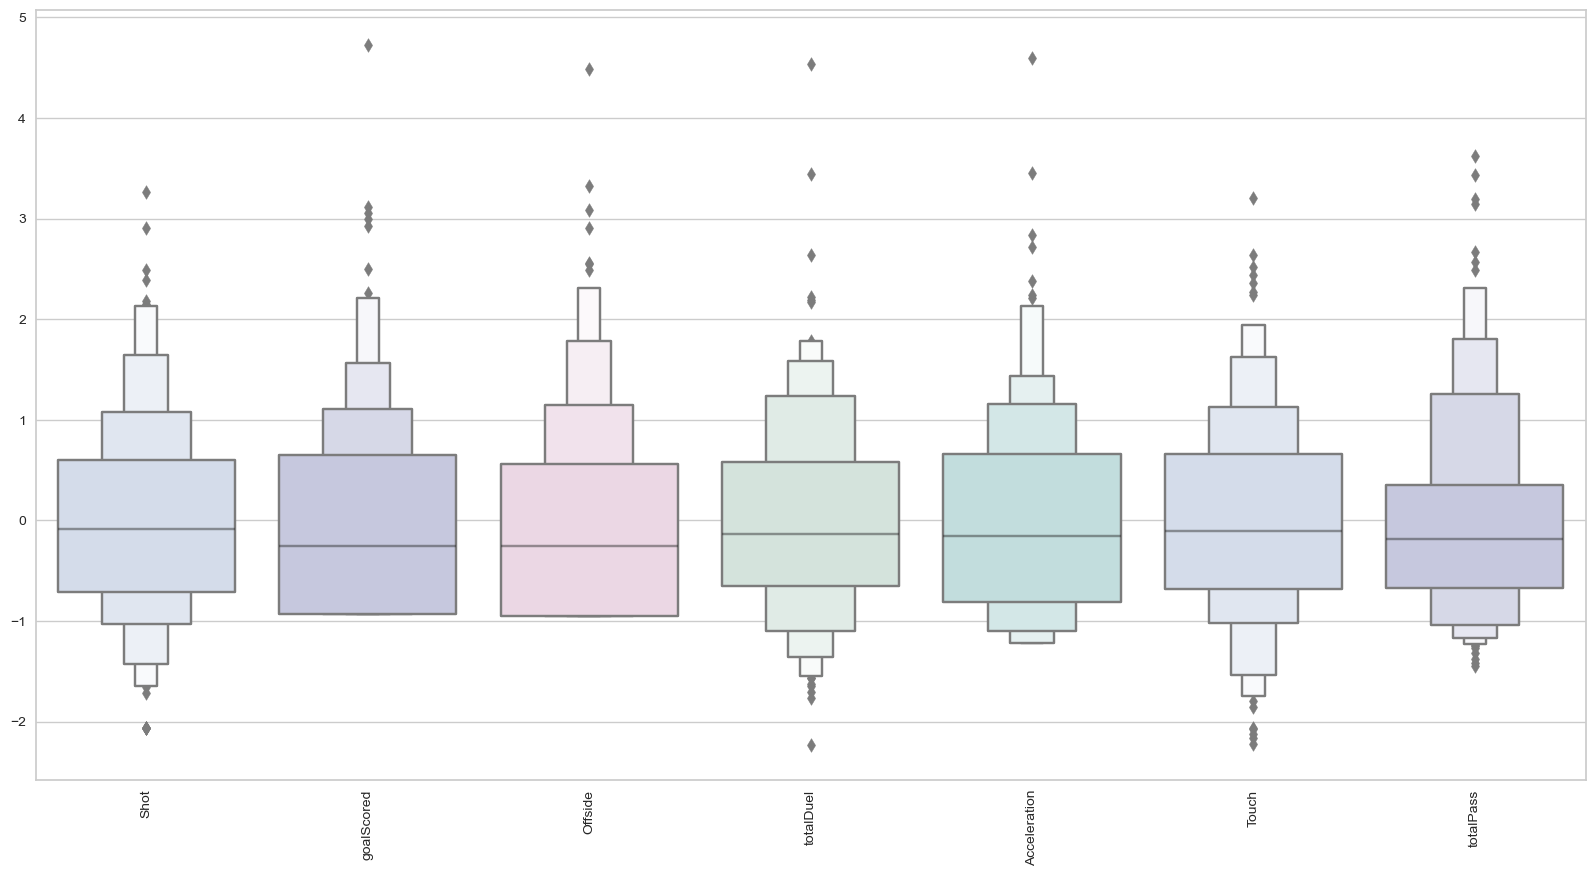

In [97]:
# Prepairing attributes of scale data
features_agg = total_performances_agg

#Set up a standard scaler for the features
col_names = list(features_agg.columns)
s_scaler = StandardScaler()
features_agg = s_scaler.fit_transform(features_agg)
features_agg = pd.DataFrame(features_agg, columns=col_names) 

#Detecting outliers
#looking at the scaled features
colours = ["#D0DBEE", "#C2C4E2", "#EED4E5", "#D1E6DC", "#BDE2E2"]
plt.figure(figsize=(20,10))
sns.boxenplot(data = features_agg,palette = colours)
plt.xticks(rotation=90)
plt.show()

In [98]:
hopkins(total_performances_agg)

0.8629990758622929

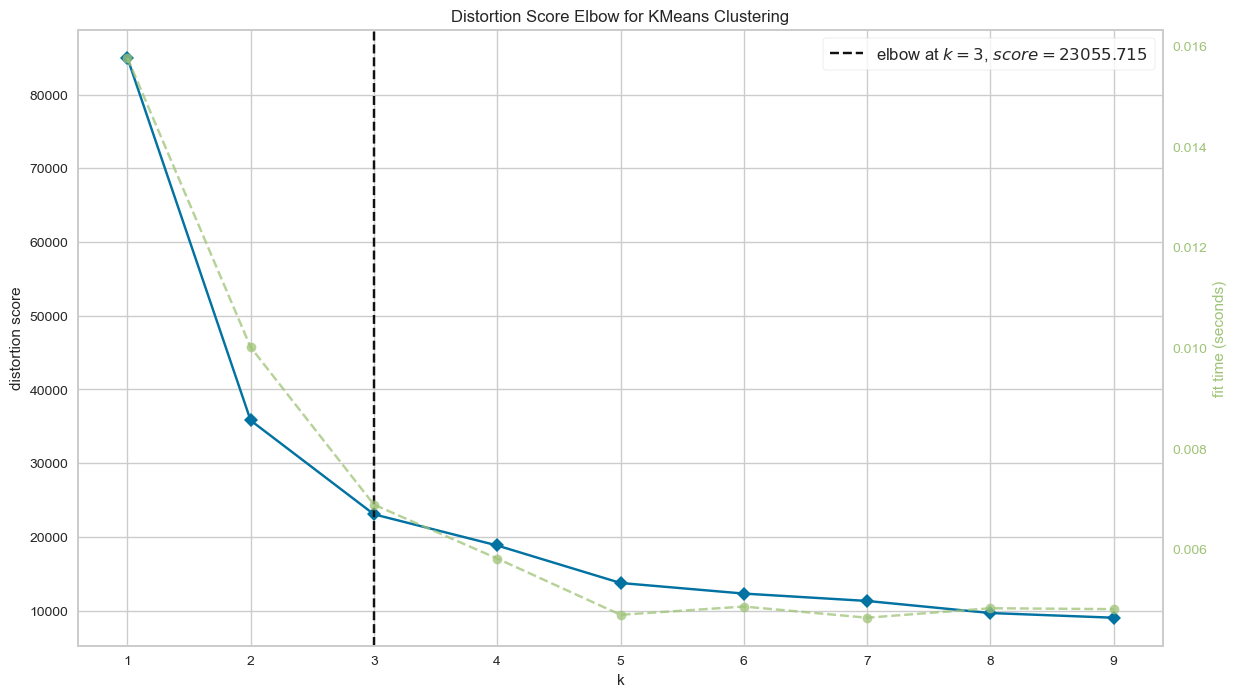

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [99]:


plt.rcParams['figure.facecolor'] = 'white'
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10))

plt.figure(figsize=(14, 8))
visualizer.fit(total_performances_agg)        
visualizer.show()

In [100]:
ssd =[]

K = range(2, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(total_performances_agg)
    ssd.append(model.inertia_)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(total_performances_agg, model.labels_)}')

Silhouette Score for 2 clusters: 0.5598836511504598
Silhouette Score for 3 clusters: 0.39987958768527504
Silhouette Score for 4 clusters: 0.34047693152159375
Silhouette Score for 5 clusters: 0.3752690787055385
Silhouette Score for 6 clusters: 0.32350460504991746
Silhouette Score for 7 clusters: 0.2917561159278231
Silhouette Score for 8 clusters: 0.3190091440013056
Silhouette Score for 9 clusters: 0.30542635878707364


n = 2


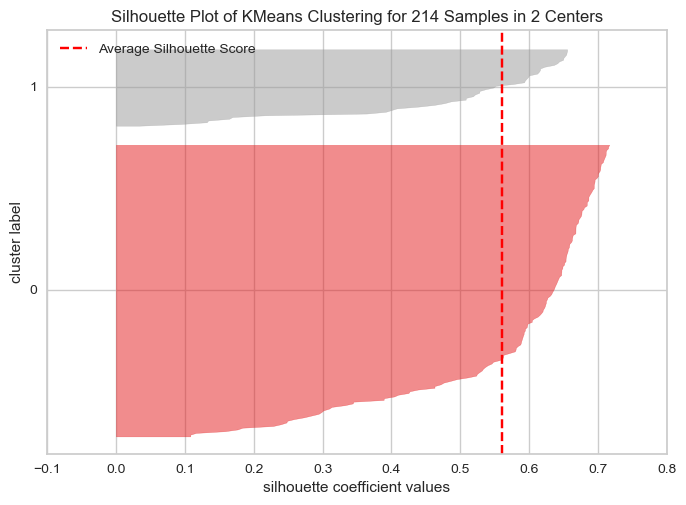

n = 3


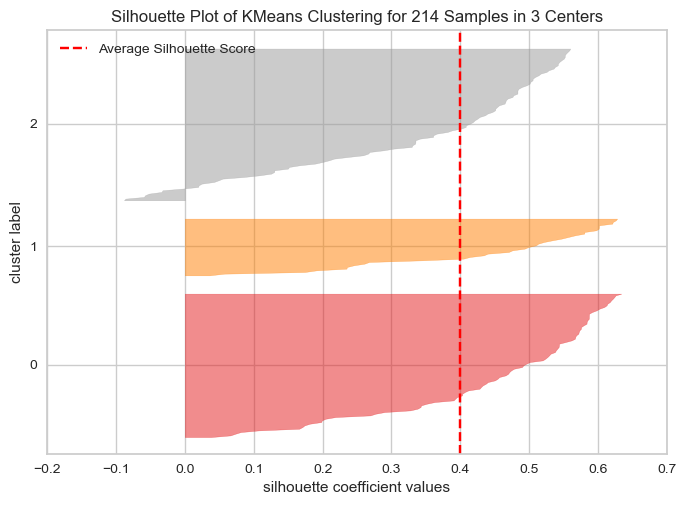

In [101]:
for n in range(2,4):
    print(f'n = {n}')
    model_3 = KMeans(n_clusters=n, random_state=42)
    visualizer = SilhouetteVisualizer(model_3)

    visualizer.fit(total_performances_agg) 
    visualizer.poof();

In [102]:
final_data = total_performances_agg.copy()
kmeans = KMeans(n_clusters = 2, random_state=42).fit(final_data)
kmeans.fit_predict(final_data)
labels = kmeans.labels_
final_data['Cluster']=labels
final_data.head()

,Shot,goalScored,Offside,totalDuel,Acceleration,Touch,totalPass,Cluster
playerId,,,,,,,,
54,2.532982,0.237467,0.039578,15.949868,1.068602,6.372032,59.485488,1
93,1.695519,0.045825,0.091650,20.804481,0.916497,3.620163,25.570265,0
116,2.337662,0.194805,0.389610,18.116883,1.168831,4.090909,41.493506,0
120,1.267606,0.000000,1.267606,19.014085,2.535211,1.901408,16.478873,0
173,2.371889,0.131772,0.197657,30.373353,2.701318,6.259151,32.613470,0


<Axes: ylabel='Cluster'>

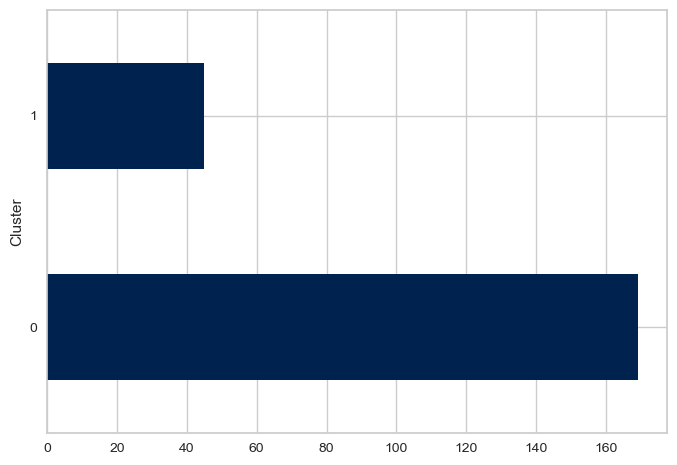

In [103]:
final_data['Cluster'].value_counts().plot(kind='barh', colormap = 'cividis')

In [104]:
final_data.groupby('Cluster').describe()

Shot                                                         \
         count      mean       std  min       25%       50%       75%   
Cluster                                                                 
0        169.0  2.024042  0.953409  0.0  1.346633  1.907285  2.625899   
1         45.0  1.735459  0.925632  0.0  1.000000  1.500000  2.494382   

                  goalScored                                          \
              max      count      mean       std  min  25%       50%   
Cluster                                                                
0        5.070423      169.0  0.245985  0.254188  0.0  0.0  0.175667   
1        3.564356       45.0  0.168734  0.210046  0.0  0.0  0.000000   

                            Offside                                     \
              75%       max   count      mean       std  min       25%   
Cluster                                                                  
0        0.397351  1.395349   169.0  0.468273  0.451474  0.0  0.120321   
1        0.333333  0.708661    45.0  0.237814  0.357264  0.0  0.000000   

                                      totalDuel                       \
              50%       75%       max     count       mean       std   
Cluster                                                                
0        0.357853  0.737705  2.400000     169.0  26.622274  8.162799   
1        0.000000  0.367347  1.782178      45.0  19.502688  5.682043   

                                                               Acceleration  \
               min        25%        50%        75%        max        count   
Cluster                                                                       
0         6.827586  21.657754  25.219780  31.969981  62.400000        169.0   
1        11.123596  15.609756  18.510638  23.720930  37.333333         45.0   

                                                                          \
             mean       std  min       25%       50%       75%       max   
Cluster                                                                    
0        0.969434  0.834330  0.0  0.298607  0.850000  1.500000  4.921875   
1        1.255565  0.870444  0.0  0.638298  1.288114  1.821429  3.428571   

         Touch                                                              \
         count      mean       std       min       25%       50%       75%   
Cluster                                                                      
0        169.0  4.250293  1.375101  1.106557  3.364486  4.186047  5.192308   
1         45.0  5.080295  1.920803  1.011236  3.846774  5.007321  6.176471   

                  totalPass                                              \
              max     count       mean        std        min        25%   
Cluster                                                                   
0        8.048780     169.0  27.810558   9.093840   9.456907  20.899329   
1        9.349939      45.0  64.324190  13.823018  46.694561  55.178571   

                                           
               50%        75%         max  
Cluster                                    
0        27.678331  34.875491   44.500000  
1        61.818182  72.290323  100.851064

In [105]:
final_data.groupby('Cluster').agg({ 'Shot':['mean','median'],
                                    'goalScored': ['mean','median','max'],
                                    'Offside': ['mean','median'],
                                    'totalDuel': ['mean','median'],
                                    'Acceleration': ['mean','median'],
                                    'totalPass': ['mean','median'],
                                    'Touch': ['mean','median']})

Shot           goalScored                       Offside  \
             mean    median       mean    median       max      mean   
Cluster                                                                
0        2.024042  1.907285   0.245985  0.175667  1.395349  0.468273   
1        1.735459  1.500000   0.168734  0.000000  0.708661  0.237814   

                   totalDuel            Acceleration            totalPass  \
           median       mean     median         mean    median       mean   
Cluster                                                                     
0        0.357853  26.622274  25.219780     0.969434  0.850000  27.810558   
1        0.000000  19.502688  18.510638     1.255565  1.288114  64.324190   

                       Touch            
            median      mean    median  
Cluster                                 
0        27.678331  4.250293  4.186047  
1        61.818182  5.080295  5.007321

[Text(0.5, 1.0, 'OFFSIDE')]

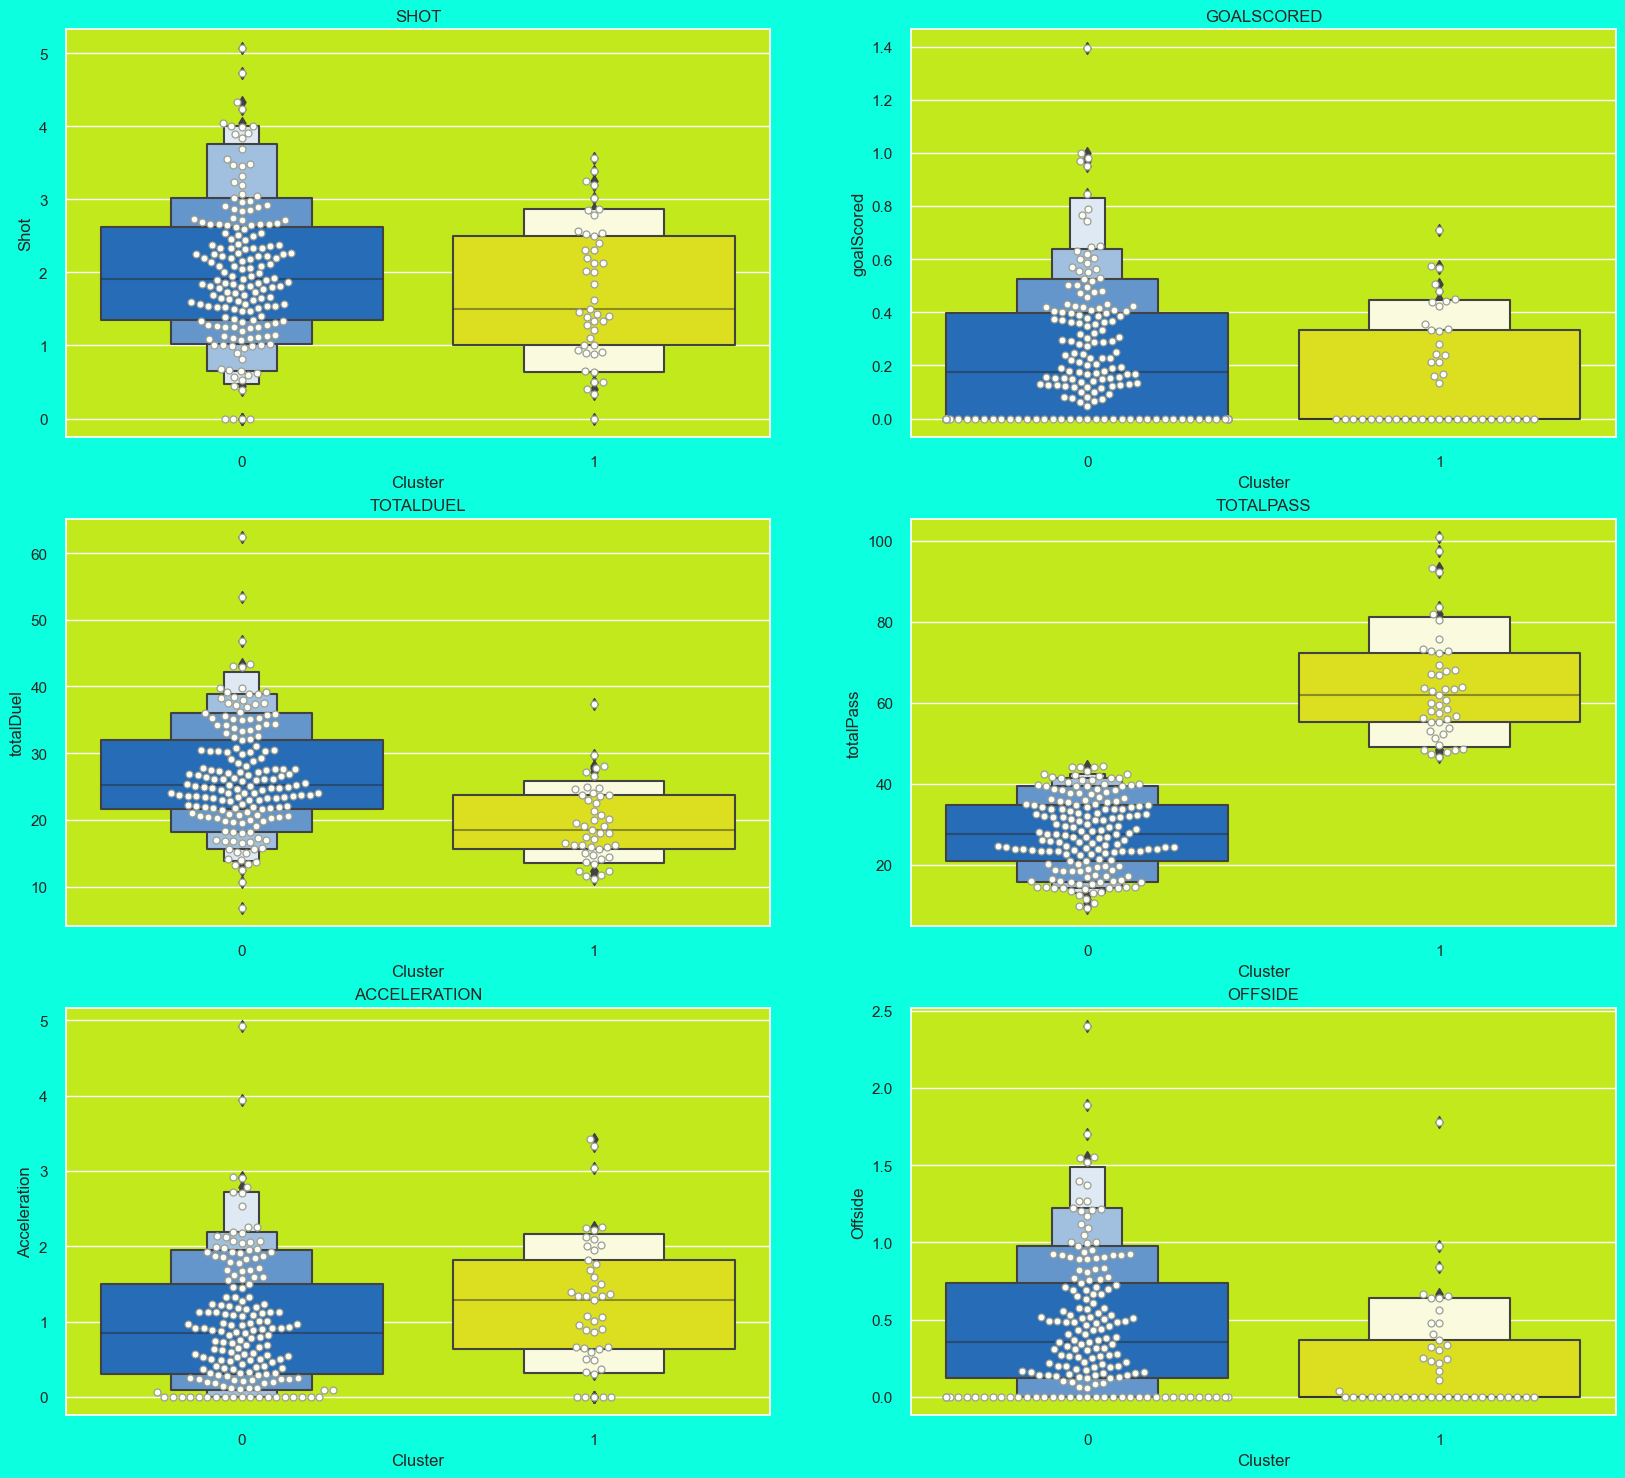

In [106]:
x = np.linspace(0, 2 * np.pi, 400)
y = np.sin(x ** 2)
sns.set(rc={"figure.facecolor":"#0CFFDE","axes.facecolor":"#C1E91C"})

fig, axs = plt.subplots(3,2, figsize = (20,18), width_ratios = [.5,.5], height_ratios= [.33,.33,.33])

# Shot
sns.swarmplot(x=final_data["Cluster"], y=final_data["Shot"], ax = axs[0,0],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["Shot"], ax = axs[0,0],palette= (["#0E6BCE","#FBFF00"])).set(title='Shot'.upper())

# goalScored
sns.swarmplot(x=final_data["Cluster"], y=final_data["goalScored"], ax = axs[0,1],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["goalScored"], ax = axs[0,1],palette= (["#0E6BCE","#FBFF00"])).set(title='goalScored'.upper())

# totalDuel
sns.swarmplot(x=final_data["Cluster"], y=final_data["totalDuel"], ax = axs[1,0],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["totalDuel"], ax = axs[1,0],palette= (["#0E6BCE","#FBFF00"])).set(title='totalDuel'.upper())

# totalPass
sns.swarmplot(x=final_data["Cluster"], y=final_data["totalPass"], ax = axs[1,1],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["totalPass"], ax = axs[1,1],palette= (["#0E6BCE","#FBFF00"])).set(title='totalPass'.upper())

# Acceleration
sns.swarmplot(x=final_data["Cluster"], y=final_data["Acceleration"], ax = axs[2,0],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["Acceleration"], ax = axs[2,0],palette= (["#0E6BCE","#FBFF00"])).set(title='Acceleration'.upper())

# Offside
sns.swarmplot(x=final_data["Cluster"], y=final_data["Offside"], ax = axs[2,1],color='#FDFFF6',edgecolor='#9B9E94',linewidth=.9)
sns.boxenplot(x=final_data["Cluster"], y=final_data["Offside"], ax = axs[2,1],palette= (["#0E6BCE","#FBFF00"])).set(title='Offside'.upper())

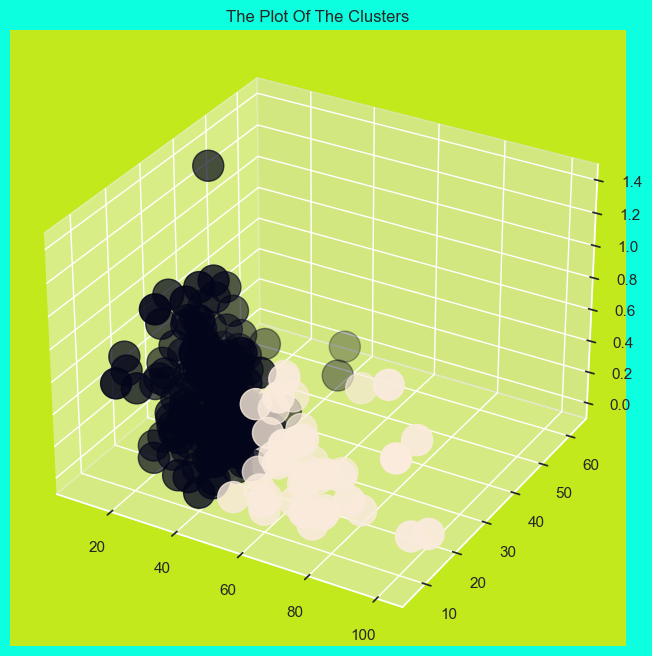

In [107]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot( projection='3d')
ax.scatter(final_data['totalPass'], final_data['totalDuel'], final_data['goalScored'], s=500, c=final_data["Cluster"], marker='o')
ax.set_title("The Plot Of The Clusters")
plt.show()

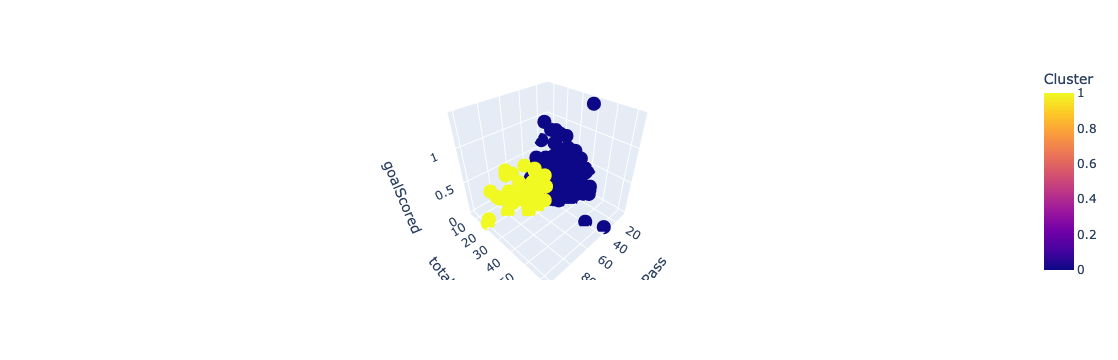

In [109]:
px.scatter_3d(final_data, x='totalPass', y='totalDuel', z='goalScored',
                    color='Cluster')

Inferences:¶

    Cluster 0 has less Pass than Cluster 1
        Do more sprint and expect ball closer to goal.
        Maybe they don't have good pass quality that's why they don't prefer to play with the ball.
    Cluster 0 has more Duel than cluster 1
    Cluster 0 has more Offside than Cluster 1
    Cluster 0 and Cluster 1 has similar attidude for Acceleration
    Both cluster has almost equal Shot and Goal Scored.

In [111]:
dummy = final_data.copy()
dummy = dummy[['totalPass','totalDuel','Shot','goalScored', 'Acceleration','Offside','Cluster']]
for col in ['totalPass','totalDuel','Shot','goalScored', 'Acceleration','Offside']:
    if col == 'goalScored':   
        dummy[col] = pd.qcut(dummy[col],7,labels = [1,2,3,4,5],duplicates='drop')
    elif col == 'Offside':
        dummy[col] = pd.qcut(dummy[col],6,labels = [1,2,3,4,5],duplicates='drop')
    else:
        dummy[col] = pd.qcut(dummy[col],5,labels = [1,2,3,4,5],duplicates='drop')

player = pd.read_csv('/Users/divyashah/Downloads/HW Spring 24/Adv programming/Adv Programming Project/dataset 4/player_games.csv')
player['Name'] = player['firstname'] + ' ' + player['lastname']
player = player.drop_duplicates(subset=['player_id','Name'])
player = player[['player_id','Name']]
player = player.rename(columns =  {'player_id':'playerId'})

dummy = dummy.reset_index()
dummy = dummy.merge(player,on='playerId',how='left')
dummy.head()

,playerId,totalPass,totalDuel,Shot,goalScored,Acceleration,Offside,Cluster,Name
0,54,5,1,4,3,3,1,1,Christian Dannemann Eriksen
1,93,2,2,3,1,3,1,0,Johann Berg Guðmunds­son
2,116,4,2,4,2,4,3,0,Georginio Wijnaldum
3,120,1,2,2,1,5,5,0,Jürgen Locadia
4,173,3,4,4,2,5,2,0,Rajiv van La Parra


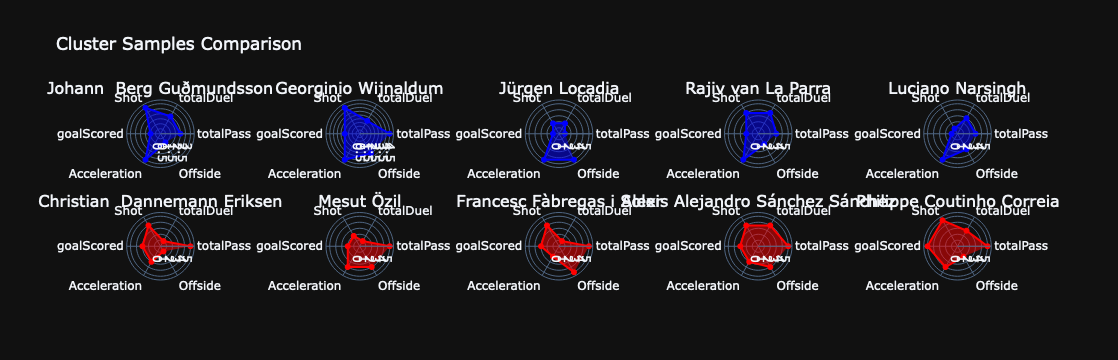

In [114]:
import plotly.graph_objs as go 
cluster_1 = dummy[dummy['Cluster']==1][['totalPass','totalDuel','Shot','goalScored', 'Acceleration','Offside','Name']].head()
cluster_0 = dummy[dummy['Cluster']==0][['totalPass','totalDuel','Shot','goalScored', 'Acceleration','Offside','Name']].head()

# Create subplots with 2 rows and 5 columns
fig = make_subplots(rows=2, cols=5, subplot_titles=["{}".format(name) for name in cluster_0['Name']] +
                                                   ["{}".format(name) for name in cluster_1['Name']],
                   specs=[[{'type': 'polar'}]*5]*2)

# Add polar line charts for cluster_0 samples
for i in range(5):
    fig.add_trace(
        go.Scatterpolar(r=cluster_0.iloc[i, :-1].values,
                        theta=['totalPass', 'totalDuel', 'Shot', 'goalScored', 'Acceleration', 'Offside'],
                        fill='toself',
                        line_color='blue',
                        name=cluster_0.iloc[i]['Name']),
        row=1, col=i + 1
    )

# Add polar line charts for cluster_1 samples
for i in range(5):
    fig.add_trace(
        go.Scatterpolar(r=cluster_1.iloc[i, :-1].values,
                        theta=['totalPass', 'totalDuel', 'Shot', 'goalScored', 'Acceleration', 'Offside'],
                        fill='toself',
                        line_color='red',
                        name=cluster_1.iloc[i]['Name']),
        row=2, col=i + 1
    )

# Update layout with dark template
fig.update_layout(title_text="Cluster Samples Comparison",
                  showlegend=False,
                  polar=dict(radialaxis=dict(visible=True)),
                  template="plotly_dark")

# Show the plot
fig.show()


The First row players are Cluster_0 players and second row players are Cluster_1 players. The main differences between them pass and Duel metrics.

    Pass - As we can see Cluster_1 players obviously better than cluster_0 players.
    Duel - As we can see Cluster_0 players obviously better than cluster_1 players.
    GoalScore - There is no significantly difference for goalscore metric between two groups.